In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#churn prediction with ANN 

In [3]:
import sys
sys.path.append(r'Users/arnav/Downloads/Churn_Modelling.csv')
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EDA (Exploratory Data Analysis)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
df['CustomerId'].nunique()
#do for all columns

10000

In [9]:
df['Geography'].value_counts

<bound method IndexOpsMixin.value_counts of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [10]:
#source https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

 Data Evaluation

In [11]:
#source https://www.kaggle.com/code/niteshyadav3103/customer-churn-prediction-using-ann/notebook

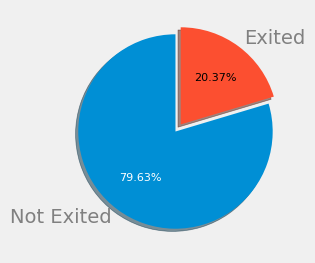

In [12]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

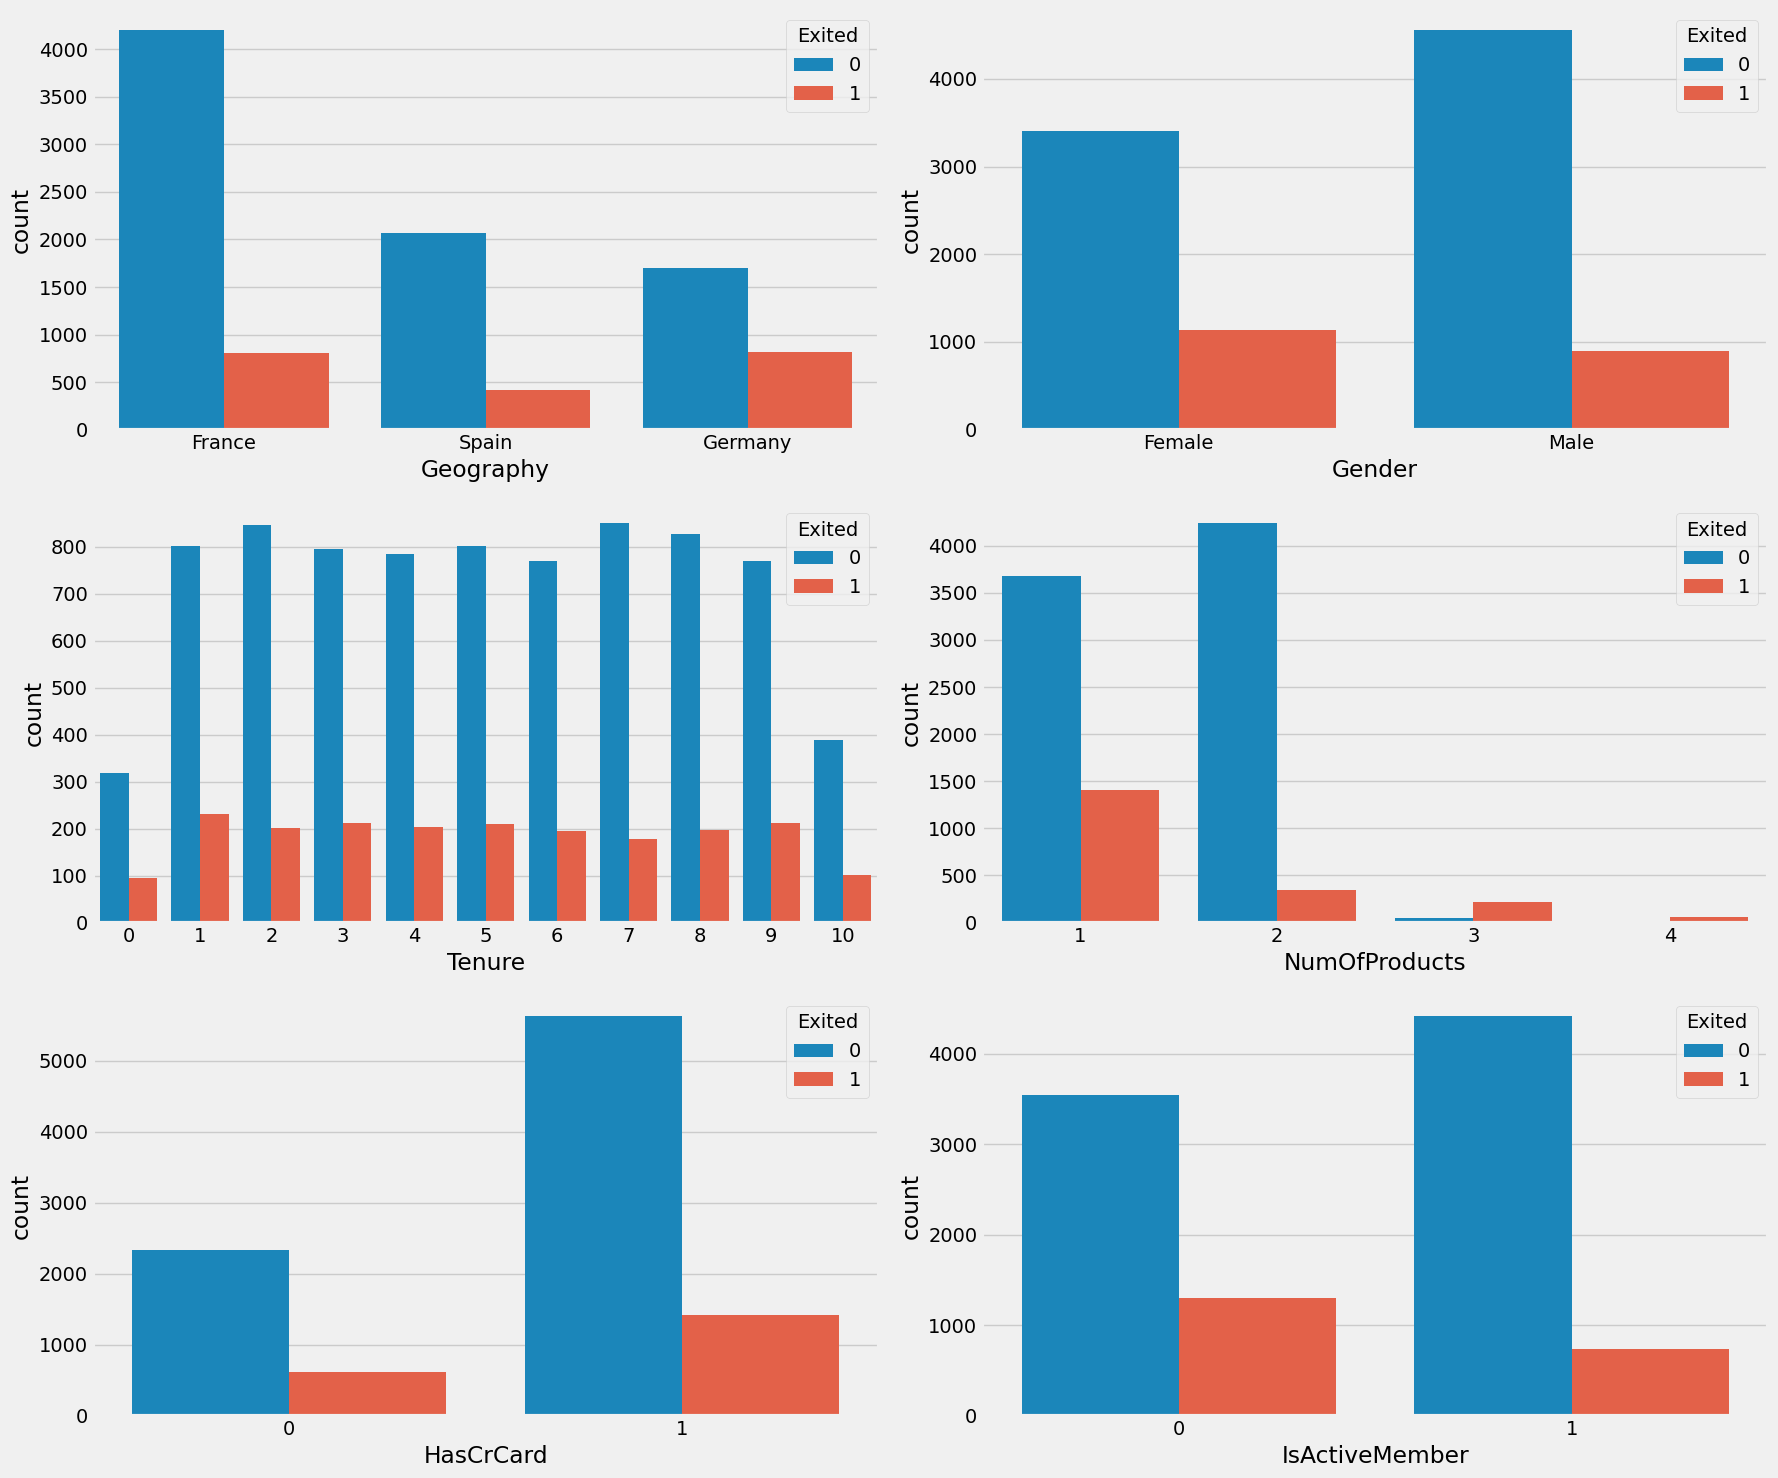

In [13]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot(x='Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot(x='Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

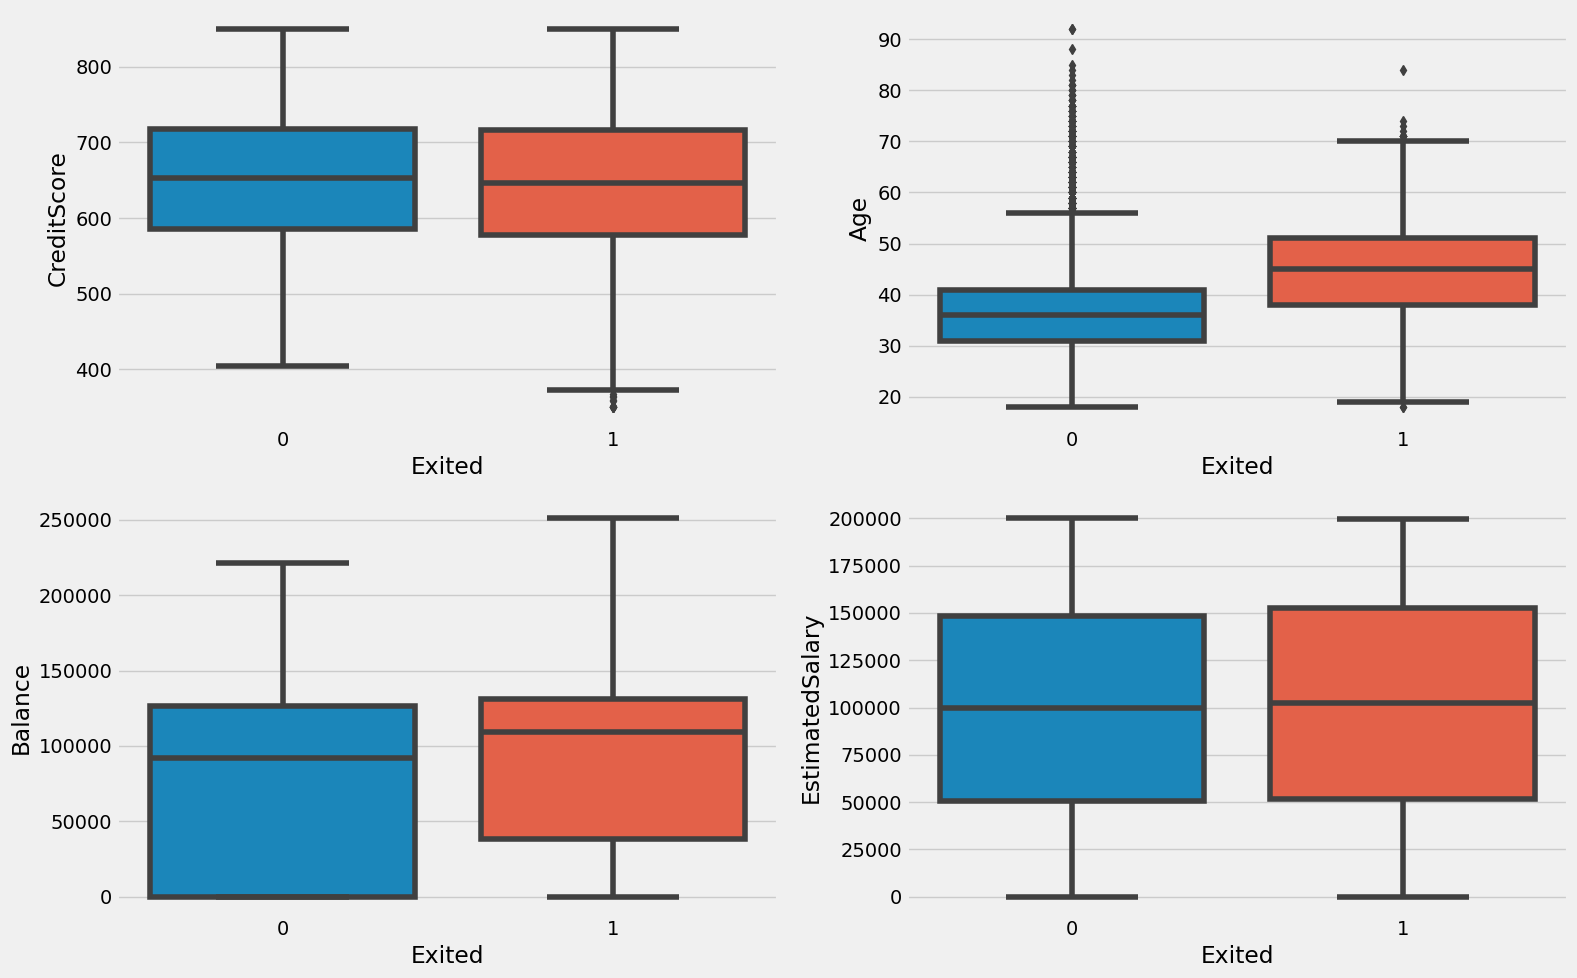

In [14]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

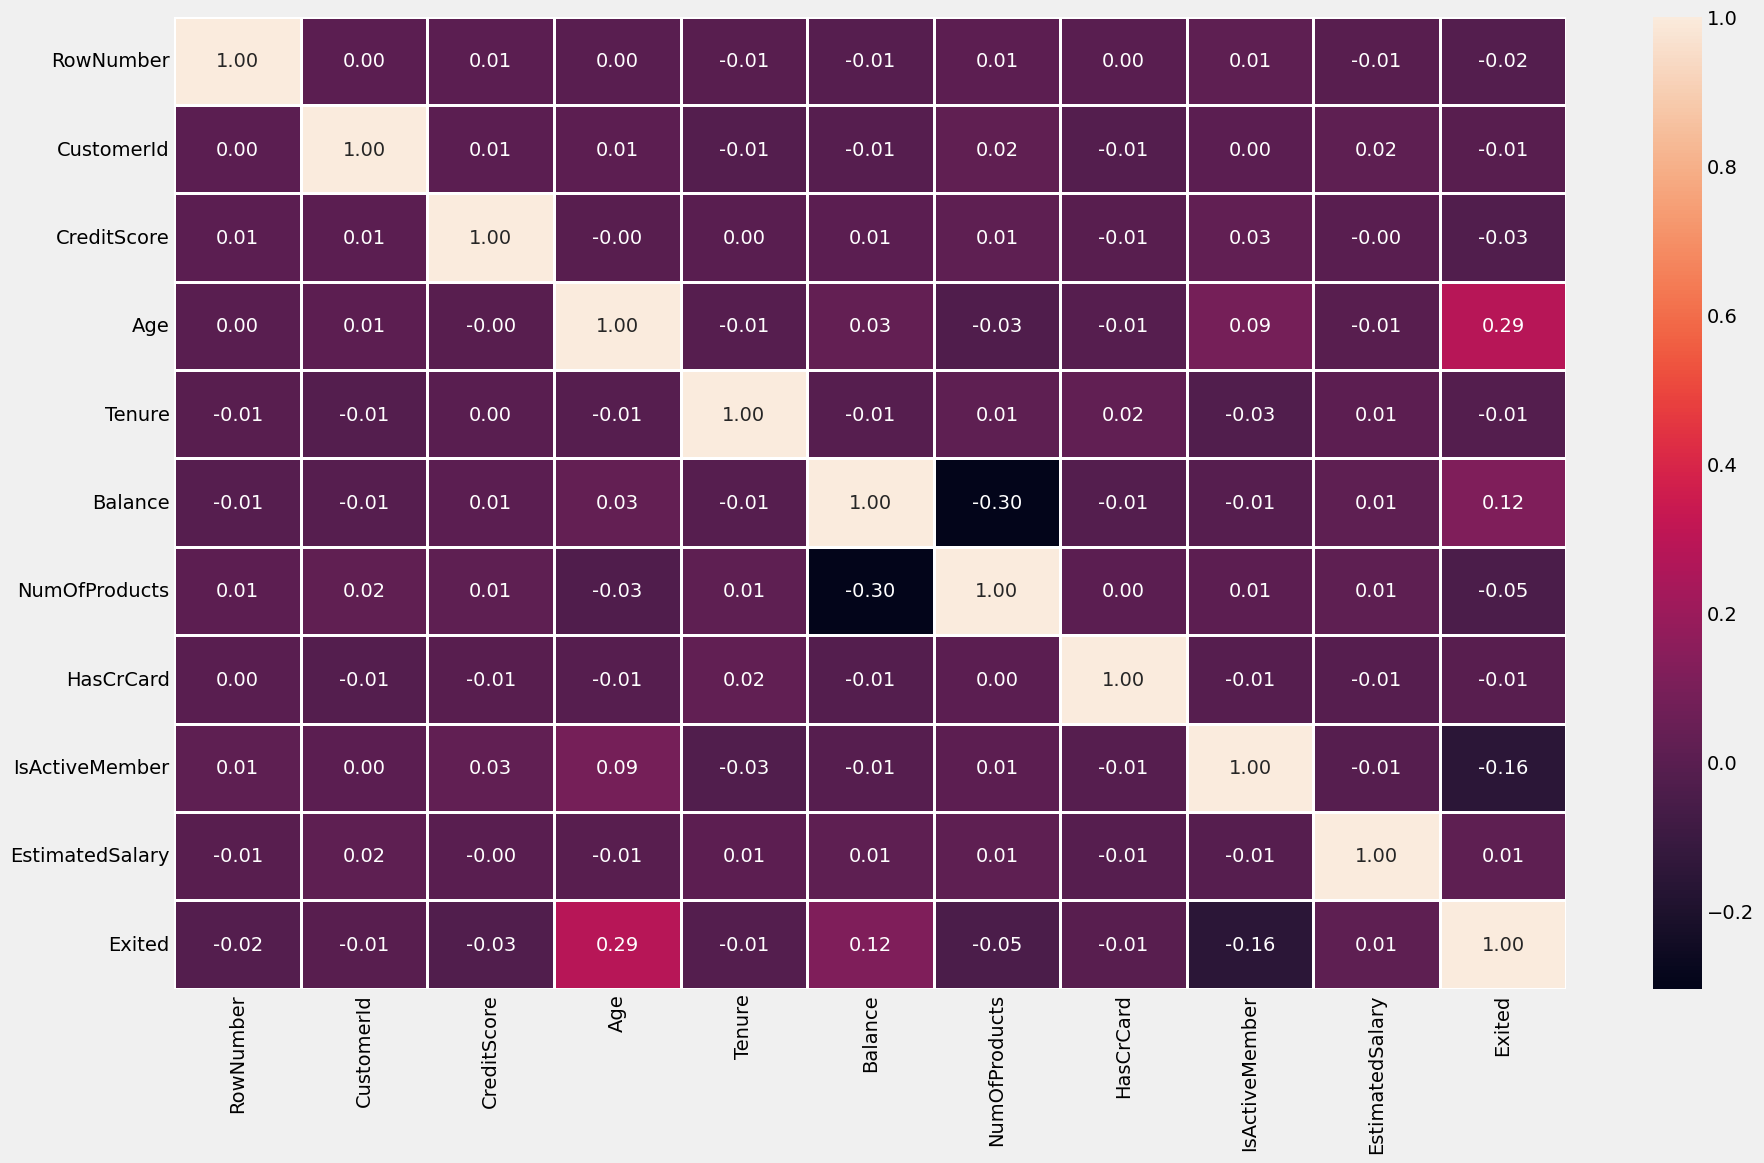

In [15]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [16]:
# dropping useless columns 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# creating features and label 

from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)


In [21]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 2s 2ms/step - loss: 0.5960 - accuracy: 0.7413 - val_loss: 0.5427 - val_accuracy: 0.7828
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8184 - val_loss: 0.4179 - val_accuracy: 0.8228
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8440 - val_loss: 0.3739 - val_accuracy: 0.8464
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8425 - val_loss: 0.3632 - val_accuracy: 0.8512
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8452 - val_loss: 0.3659 - val_accuracy: 0.8480
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8421 - val_loss: 0.3585 - val_accuracy: 0.8528
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8452 - val_loss: 0.3674 - val_accuracy: 0.8440

In [24]:
#Visualizing Training and Validation Loss

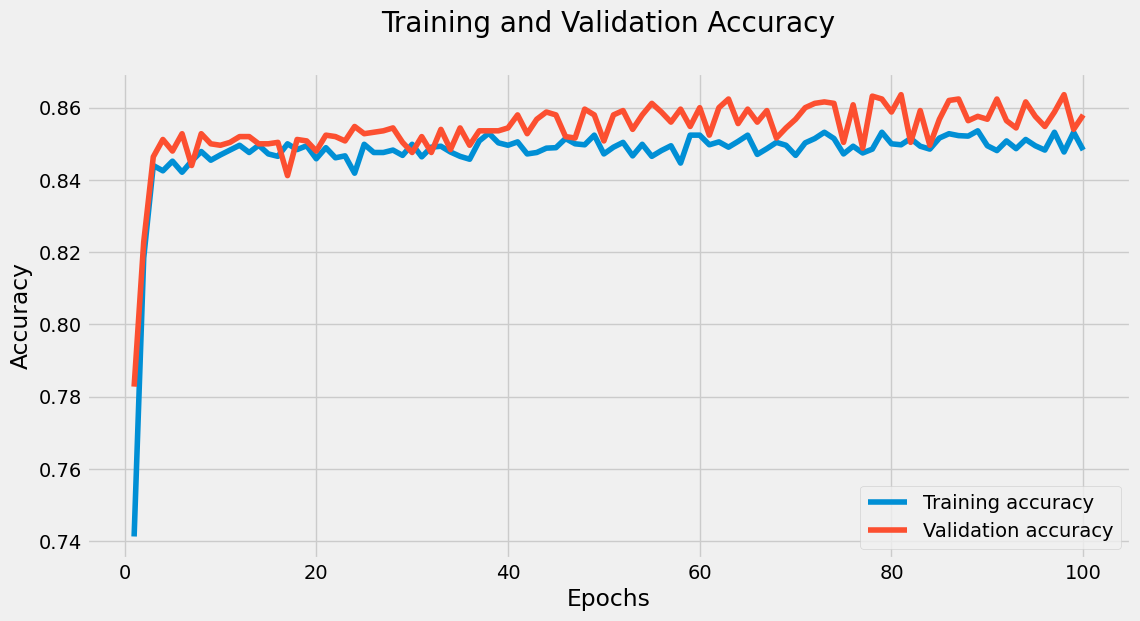

In [25]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_loss, label = 'Training accuracy')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 782us/step - loss: 0.3470 - accuracy: 0.8580
Accuracy of model is 0.8579999804496765


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                        

In [28]:
X = df[['Age', 'CreditScore']].copy()


In [29]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8527
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8535
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8501
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8535
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8505
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8529
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8529
Epoch 8/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8500
Epoch 9/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8515
Epoch 10/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8489

Results:
                    Model  Accuracy (Without Balancing)  \
0     Logistic Regression                        0.8124   
1           Random Forest                        0.8708   
2       Gradient Boosting                        0.8680   
3  Support Vector Machine                        0.8588   
4             Naive Bayes                        0.8292   
5     K-Nearest Neighbors                        0.8344   
6                 XGBoost                        0.8652   
7           Decision Tree                        0.7940   
8                AdaBoost                        0.8572   

   Accuracy (With Balancing)  Accuracy Difference  
0                     0.7032              -0.1092  
1                     0.8420              -0.0288  
2                     0.8396              -0.0284  
3                     0.7884              -0.0704  
4                     0.7432              -0.0860  
5                     0.7420              -0.0924  
6                     0.8628        

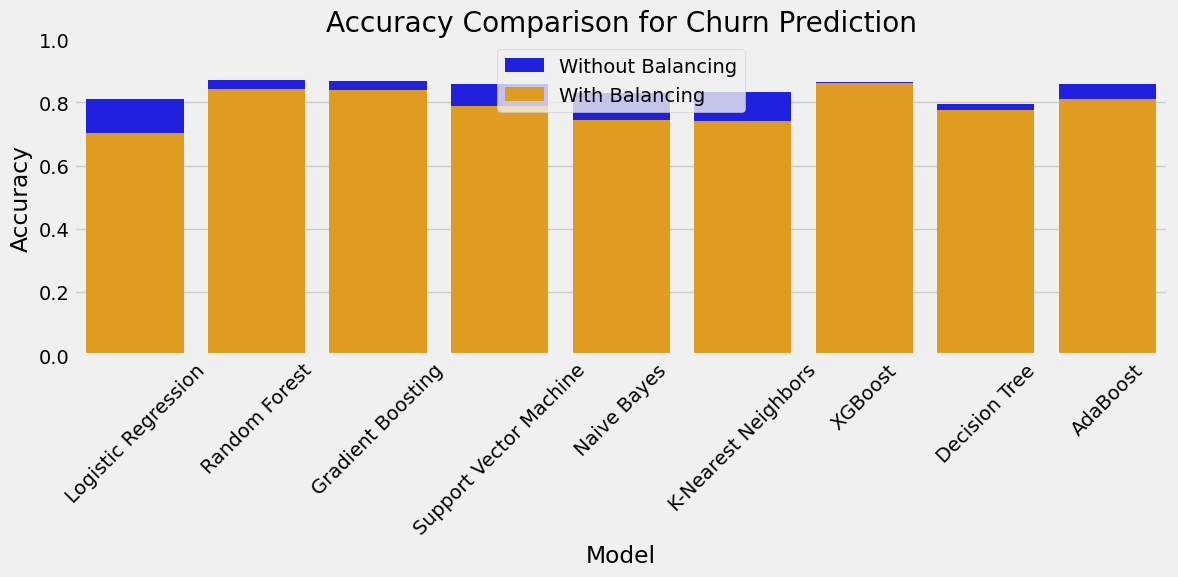

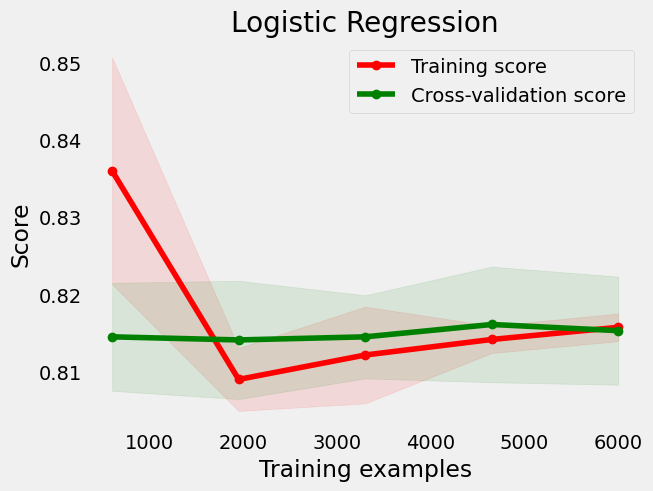

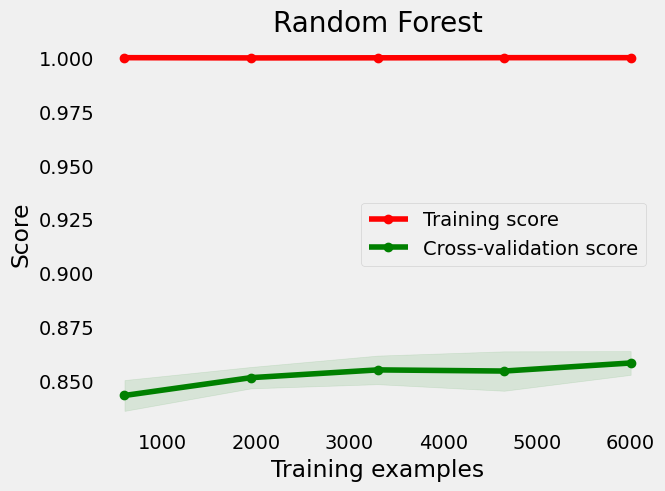

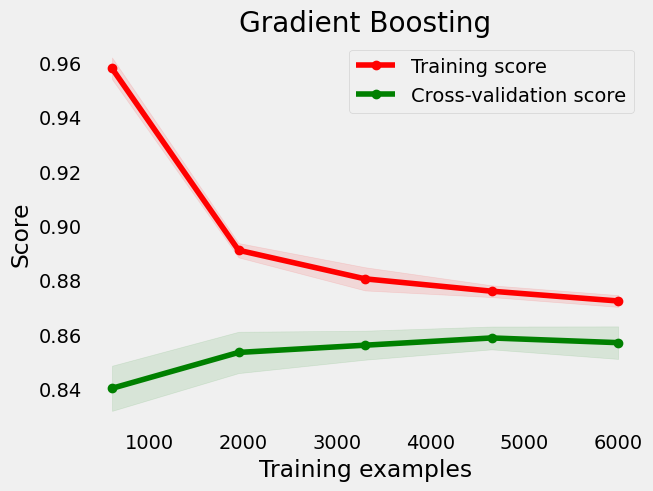

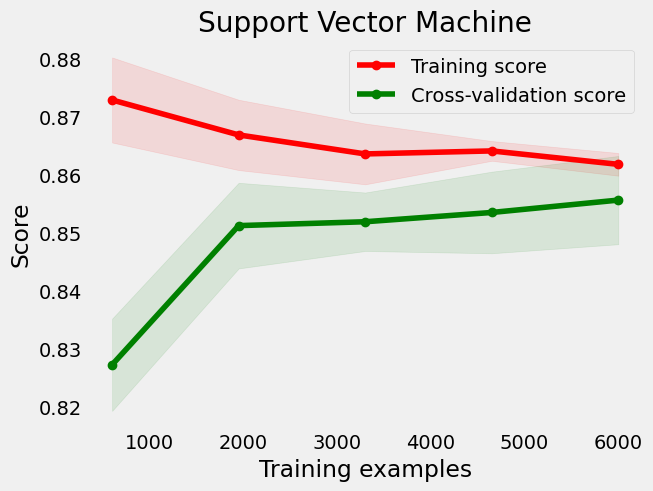

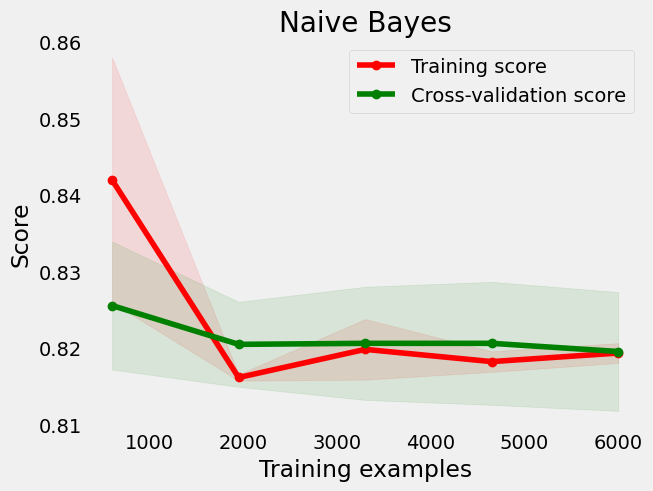

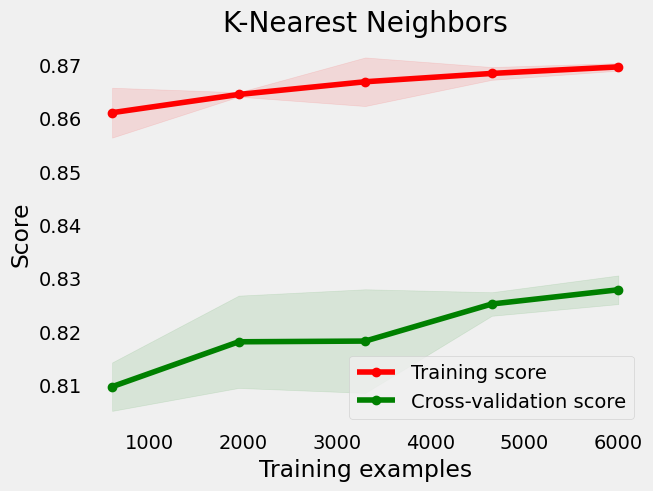

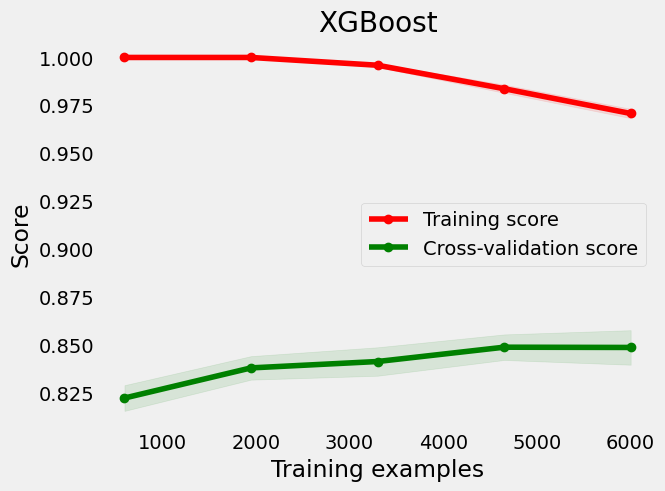

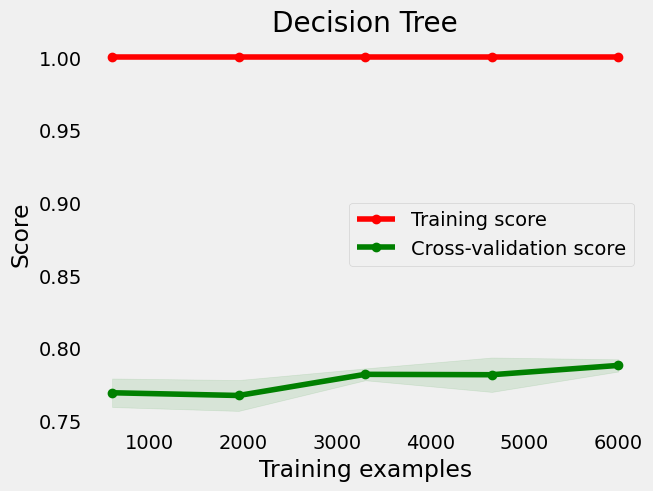

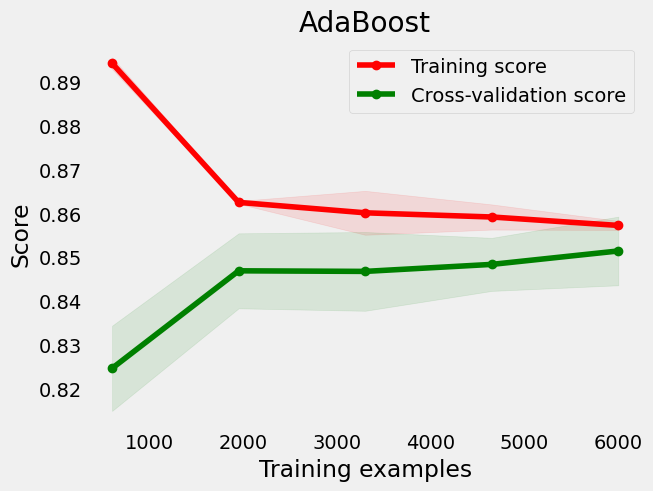

In [30]:
# with and without balancing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model without balancing
results_no_balancing = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_no_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train and evaluate each model on balanced data
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_no_balancing.keys()),
    'Accuracy (Without Balancing)': [metrics['Accuracy'] for metrics in results_no_balancing.values()],
    'Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Accuracy Difference': [metrics['Accuracy'] - results_no_balancing[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy (Without Balancing)', color='blue', label='Without Balancing')
sns.barplot(data=results_df, x='Model', y='Accuracy (With Balancing)', color='orange', label='With Balancing')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.model_selection import learning_curve

# Feature Engineering
# Create a new feature 'CreditScoreAgeRatio'
df['CreditScoreAgeRatio'] = df['CreditScore'] / df['Age']

# Split the data into features and target with new feature
X_fe = df.drop('Exited', axis=1)
y_fe = df['Exited']

# Split the data into training and test sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_fe_scaled = scaler.fit_transform(X_train_fe)
X_test_fe_scaled = scaler.transform(X_test_fe)

# Define function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Call the function to plot learning curves
for name, model in models.items():
    plot_learning_curve(model, name, X_train_fe_scaled, y_train_fe, cv=5)
plt.show()


In [45]:
output = results_df.to_string(index=True, header=True)
output = output.replace('/n', ' ')
print(output)


                    Model  Validation Accuracy (With Balancing)  Test Accuracy (With Balancing)  Validation Accuracy Difference
0     Logistic Regression                              0.743721                          0.6975                        0.046221
1           Random Forest                              0.847527                          0.7995                        0.048027
2       Gradient Boosting                              0.820055                          0.7970                        0.023055
3  Support Vector Machine                              0.818093                          0.7900                        0.028093
4             Naive Bayes                              0.764129                          0.7135                        0.050629
5     K-Nearest Neighbors                              0.797096                          0.7380                        0.059096
6                 XGBoost                              0.846546                          0.7940         

Results:
                    Model  Accuracy (Without Balancing)  \
0     Logistic Regression                        0.8025   
1           Random Forest                        0.8610   
2       Gradient Boosting                        0.8630   
3  Support Vector Machine                        0.8615   
4             Naive Bayes                        0.8275   
5     K-Nearest Neighbors                        0.8285   
6                 XGBoost                        0.8545   
7           Decision Tree                        0.7875   
8                AdaBoost                        0.8545   

   Accuracy (With Balancing)  Accuracy Difference  
0                     0.7065              -0.0960  
1                     0.8375              -0.0235  
2                     0.8350              -0.0280  
3                     0.7915              -0.0700  
4                     0.7470              -0.0805  
5                     0.7475              -0.0810  
6                     0.8460        

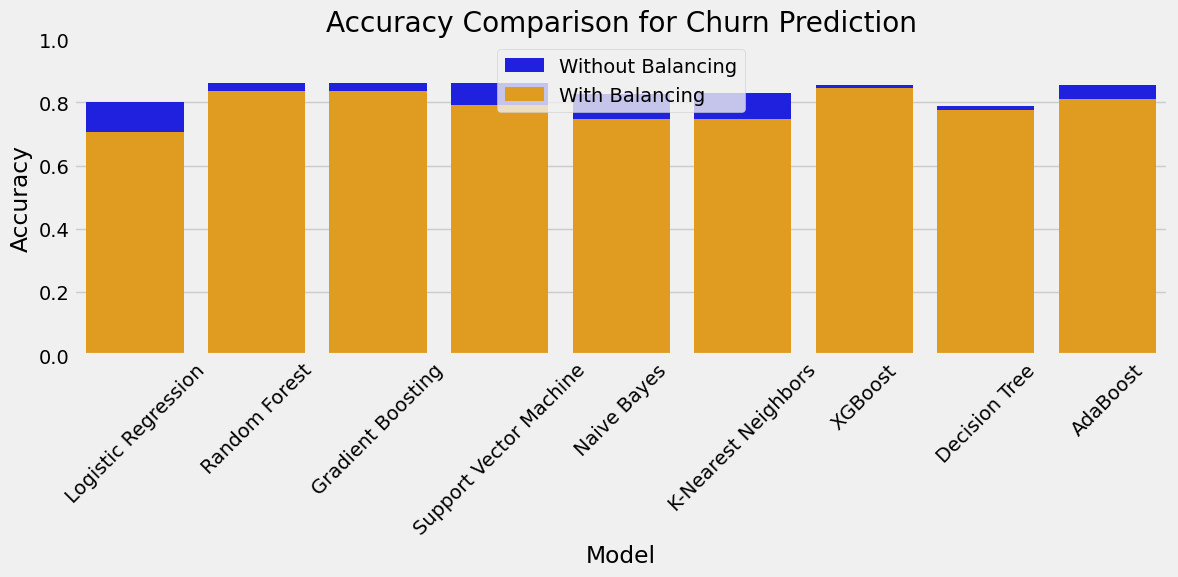

In [31]:
# without exited balanced in train and tested
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model without balancing
results_no_balancing = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    results_no_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Train and evaluate each model on balanced data
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_no_balancing.keys()),
    'Accuracy (Without Balancing)': [metrics['Accuracy'] for metrics in results_no_balancing.values()],
    'Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Accuracy Difference': [metrics['Accuracy'] - results_no_balancing[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy (Without Balancing)', color='blue', label='Without Balancing')
sns.barplot(data=results_df, x='Model', y='Accuracy (With Balancing)', color='orange', label='With Balancing')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


Results:
                    Model  Validation Accuracy (With Balancing)  \
0     Logistic Regression                              0.743721   
1           Random Forest                              0.846546   
2       Gradient Boosting                              0.820055   
3  Support Vector Machine                              0.818093   
4             Naive Bayes                              0.764129   
5     K-Nearest Neighbors                              0.797096   
6                 XGBoost                              0.846546   
7           Decision Tree                              0.767857   
8                AdaBoost                              0.806122   

   Test Accuracy (With Balancing)  Validation Accuracy Difference  
0                          0.6975                        0.046221  
1                          0.8060                        0.040546  
2                          0.7970                        0.023055  
3                          0.7900               

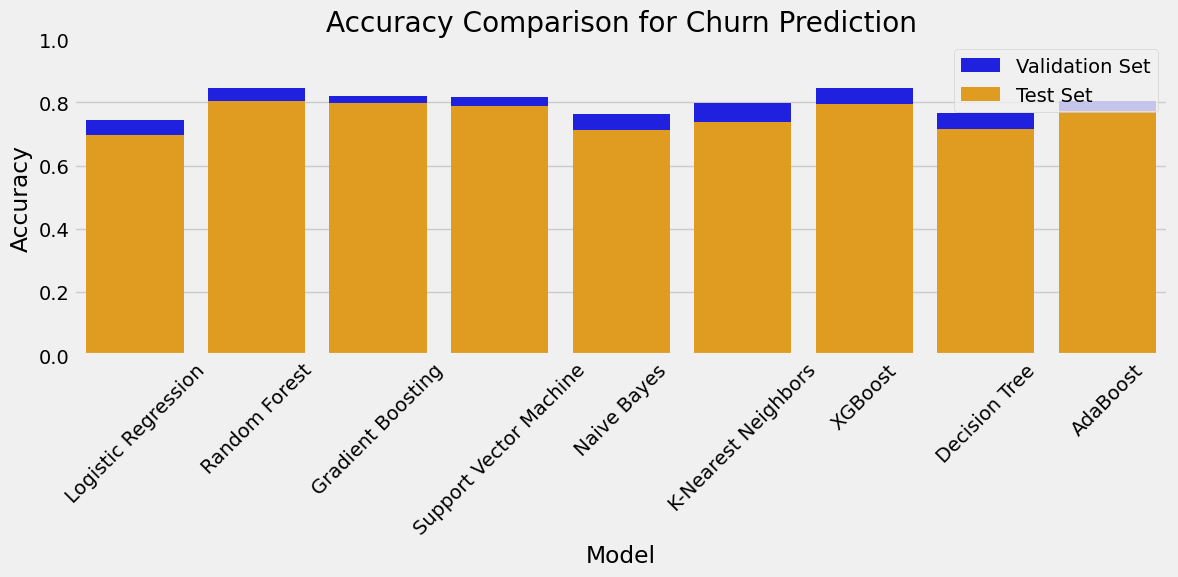

In [32]:
# Split the balanced train and validation sets into train (60%) and test(20%) and validation (20%) sets while preserving the 'Exited' distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into train (60%), validation (20%), and test (20%) sets while preserving the 'Exited' distribution
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance the training and validation data using SMOTE
smote = SMOTE(random_state=42)
X_train_val_balanced, y_train_val_balanced = smote.fit_resample(X_train_val, y_train_val)

# Split the balanced train and validation sets into train (60%) and validation (40%) sets while preserving the 'Exited' distribution
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_val_balanced, y_train_val_balanced, test_size=0.4, random_state=42, stratify=y_train_val_balanced)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_balanced_scaled = scaler.transform(X_val_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model on the balanced train and validation sets
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced_scaled, y_train_balanced)
    y_pred = model.predict(X_val_balanced_scaled)
    accuracy = accuracy_score(y_val_balanced, y_pred)
    precision = precision_score(y_val_balanced, y_pred)
    recall = recall_score(y_val_balanced, y_pred)
    f1 = f1_score(y_val_balanced, y_pred)
    roc_auc = roc_auc_score(y_val_balanced, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate each model on the test set
results_test = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_test[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_balancing.keys()),
    'Validation Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Test Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_test.values()],
    'Validation Accuracy Difference': [metrics['Accuracy'] - results_test[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Validation Accuracy (With Balancing)', color='blue', label='Validation Set')
sns.barplot(data=results_df, x='Model', y='Test Accuracy (With Balancing)', color='orange', label='Test Set')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


Results:
                    Model  Validation Accuracy (With Balancing)  \
0     Logistic Regression                              0.743721   
1           Random Forest                              0.847724   
2       Gradient Boosting                              0.820055   
3  Support Vector Machine                              0.818093   
4             Naive Bayes                              0.764129   
5     K-Nearest Neighbors                              0.797096   
6                 XGBoost                              0.846546   
7           Decision Tree                              0.770016   
8                AdaBoost                              0.806122   

   Test Accuracy (With Balancing)  Validation Accuracy Difference  
0                          0.6975                        0.046221  
1                          0.8095                        0.038224  
2                          0.7970                        0.023055  
3                          0.7900               

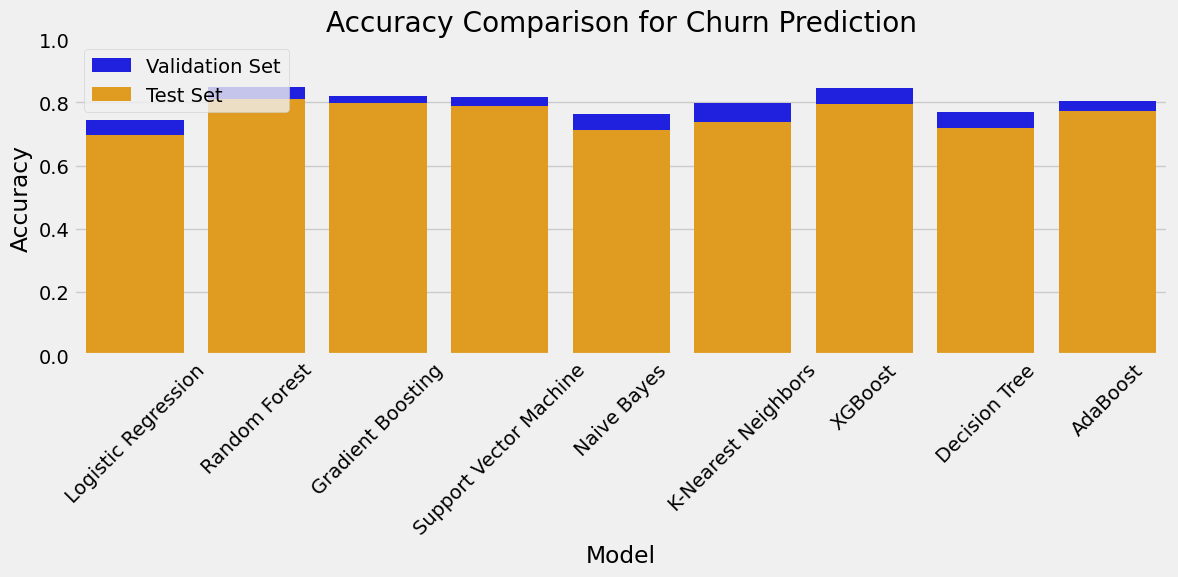

In [46]:
# Feature EngineeringZS
df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

# The feature "Balance_to_Salary_Ratio" is included in the feature engineering step to capture the 
# relationship between a customer's account balance and their estimated salary.
# It can provide insights into the customer's financial stability, affordability, and risk assessment, 
# which are factors that can influence their likelihood of churn. 
# Additionally, this feature can be useful for targeting promotions or offers to different customer segments based on their balance-to-salary ratio.


# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltS
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into train (60%), validation (20%), and test (20%) sets while preserving the 'Exited' distribution
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance the training and validation data using SMOTE
smote = SMOTE(random_state=42)
X_train_val_balanced, y_train_val_balanced = smote.fit_resample(X_train_val, y_train_val)

# Split the balanced train and validation sets into train (60%) and validation (40%) sets while preserving the 'Exited' distribution
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_val_balanced, y_train_val_balanced, test_size=0.4, random_state=42, stratify=y_train_val_balanced)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_balanced_scaled = scaler.transform(X_val_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model on the balanced train and validation sets
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced_scaled, y_train_balanced)
    y_pred = model.predict(X_val_balanced_scaled)
    accuracy = accuracy_score(y_val_balanced, y_pred)
    precision = precision_score(y_val_balanced, y_pred)
    recall = recall_score(y_val_balanced, y_pred)
    f1 = f1_score(y_val_balanced, y_pred)
    roc_auc = roc_auc_score(y_val_balanced, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate each model on the test set
results_test = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_test[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_balancing.keys()),
    'Validation Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Test Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_test.values()],
    'Validation Accuracy Difference': [metrics['Accuracy'] - results_test[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Validation Accuracy (With Balancing)', color='blue', label='Validation Set')
sns.barplot(data=results_df, x='Model', y='Test Accuracy (With Balancing)', color='orange', label='Test Set')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
output = results_df.to_string(index=True, header=True)
output = output.replace('/n', ' ')
print(output)


                    Model  Validation Accuracy (With Balancing)  Test Accuracy (With Balancing)  Validation Accuracy Difference
0     Logistic Regression                              0.743721                          0.6975                        0.046221
1           Random Forest                              0.847724                          0.8095                        0.038224
2       Gradient Boosting                              0.820055                          0.7970                        0.023055
3  Support Vector Machine                              0.818093                          0.7900                        0.028093
4             Naive Bayes                              0.764129                          0.7135                        0.050629
5     K-Nearest Neighbors                              0.797096                          0.7380                        0.059096
6                 XGBoost                              0.846546                          0.7940         

Results:
                    Model  Validation Accuracy (With Balancing)  \
0     Logistic Regression                              0.698620   
1           Random Forest                              0.784509   
2       Gradient Boosting                              0.789110   
3  Support Vector Machine                              0.782209   
4             Naive Bayes                              0.736196   
5     K-Nearest Neighbors                              0.725460   
6                 XGBoost                              0.761503   
7           Decision Tree                              0.715491   
8                AdaBoost                              0.792178   

   Test Accuracy (With Balancing)  Validation Accuracy Difference  
0                          0.6945                        0.004120  
1                          0.7740                        0.010509  
2                          0.7885                        0.000610  
3                          0.7795               

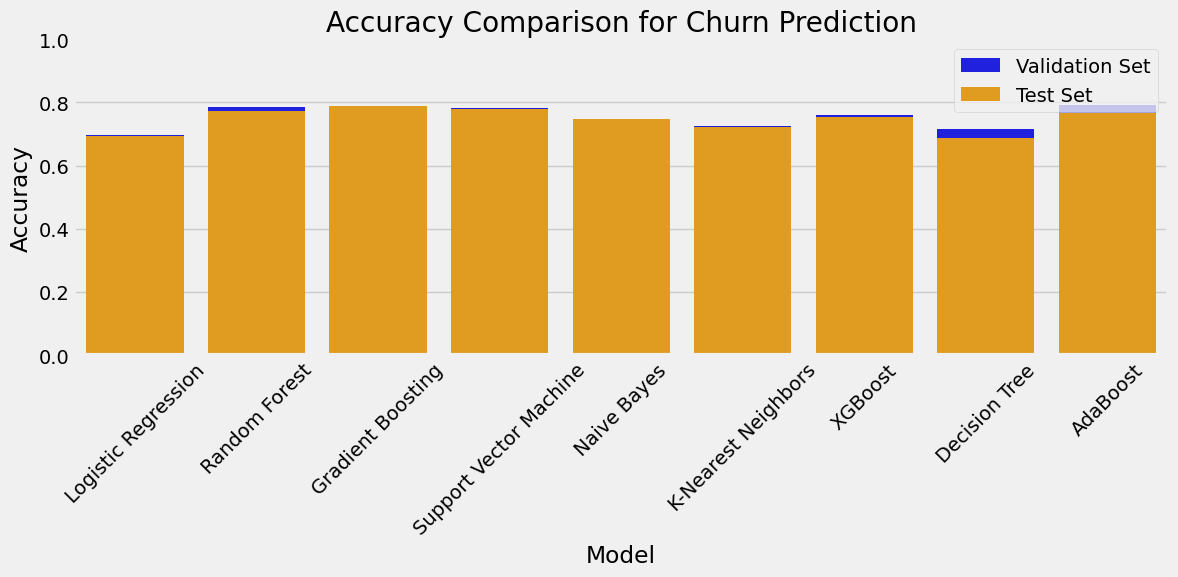

In [49]:
# Validation is used in this model to evaluate the performance of different machine learning models during training.
# It helps in selecting the best-performing model before testing it on unseen data.
# The validation set is used to assess the models' accuracy, precision, recall, F1-score, and ROC AUC. 
# By comparing the models' performance on the validation set, the one with the highest accuracy can be chosen for further evaluation on the test set. 
# The validation accuracy difference in the results DataFrame shows the variation in accuracy between the validation and the test set, indicating the capability of the models.

from imblearn.under_sampling import RandomUnderSampler
# Undersample the majority class in the training and validation data
undersampler = RandomUnderSampler(random_state=42)
X_train_val_balanced, y_train_val_balanced = undersampler.fit_resample(X_train_val, y_train_val)

# Split the balanced train and validation sets into train (60%) and test and (20%) validation (20%) sets while preserving the 'Exited' distribution
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_val_balanced, y_train_val_balanced, test_size=0.4, random_state=42, stratify=y_train_val_balanced)

# Undersample the majority class in the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into train (60%), validation (20%), and test (20%) sets while preserving the 'Exited' distribution
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance the training and validation data using SMOTE
#smote = SMOTE(random_state=42)
#X_train_val_balanced, y_train_val_balanced = smote.fit_resample(X_train_val, y_train_val)

# Split the balanced train and validation sets into train (60%) and validation (40%) sets while preserving the 'Exited' distribution
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_val_balanced, y_train_val_balanced, test_size=0.4, random_state=42, stratify=y_train_val_balanced)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_balanced_scaled = scaler.transform(X_val_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model on the balanced train and validation sets
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced_scaled, y_train_balanced)
    y_pred = model.predict(X_val_balanced_scaled)
    accuracy = accuracy_score(y_val_balanced, y_pred)
    precision = precision_score(y_val_balanced, y_pred)
    recall = recall_score(y_val_balanced, y_pred)
    f1 = f1_score(y_val_balanced, y_pred)
    roc_auc = roc_auc_score(y_val_balanced, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate each model on the test set
results_test = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_test[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_balancing.keys()),
    'Validation Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Test Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_test.values()],
    'Validation Accuracy Difference': [metrics['Accuracy'] - results_test[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Validation Accuracy (With Balancing)', color='blue', label='Validation Set')
sns.barplot(data=results_df, x='Model', y='Test Accuracy (With Balancing)', color='orange', label='Test Set')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
output = results_df.to_string(index=True, header=True)
output = output.replace('/n', ' ')
print(output)


                    Model  Validation Accuracy (With Balancing)  Test Accuracy (With Balancing)  Validation Accuracy Difference
0     Logistic Regression                              0.698620                          0.6945                        0.004120
1           Random Forest                              0.784509                          0.7740                        0.010509
2       Gradient Boosting                              0.789110                          0.7885                        0.000610
3  Support Vector Machine                              0.782209                          0.7795                        0.002709
4             Naive Bayes                              0.736196                          0.7470                       -0.010804
5     K-Nearest Neighbors                              0.725460                          0.7220                        0.003460
6                 XGBoost                              0.761503                          0.7540         

Results:
                    Model  Validation Accuracy (With Balancing)  \
0     Logistic Regression                              0.743721   
1           Random Forest                              0.847527   
2       Gradient Boosting                              0.820055   
3  Support Vector Machine                              0.818093   
4             Naive Bayes                              0.764129   
5     K-Nearest Neighbors                              0.797096   
6                 XGBoost                              0.846546   
7           Decision Tree                              0.768642   
8                AdaBoost                              0.806122   
9  Balanced Random Forest                              0.845565   

   Test Accuracy (With Balancing)  Validation Accuracy Difference  
0                          0.6975                        0.046221  
1                          0.7995                        0.048027  
2                          0.7970                

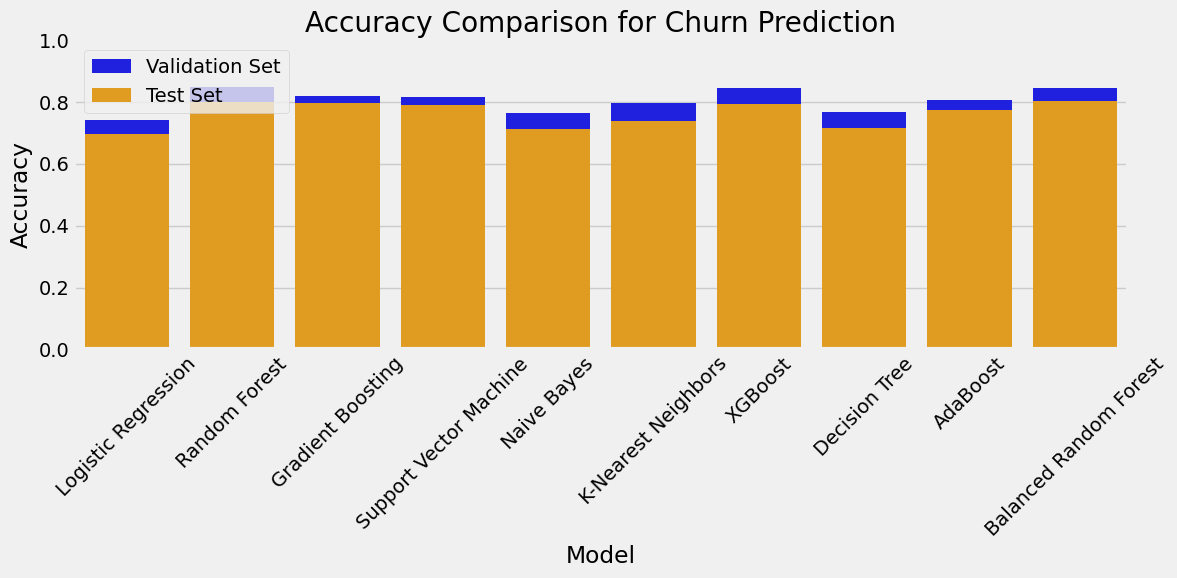

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier

# Load the dataset
df = pd.read_csv('C:/Users/arnav/Downloads/Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into train (60%), validation (20%), and test (20%) sets while preserving the 'Exited' distribution
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance the training and validation data using SMOTE
smote = SMOTE(random_state=42)
X_train_val_balanced, y_train_val_balanced = smote.fit_resample(X_train_val, y_train_val)

# Split the balanced train and validation sets into train (60%) and validation (40%) sets while preserving the 'Exited' distribution
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_val_balanced, y_train_val_balanced, test_size=0.4, random_state=42, stratify=y_train_val_balanced)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_balanced_scaled = scaler.transform(X_val_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the models
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier()
}


# Train and evaluate each model on the balanced train and validation sets
results_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced_scaled, y_train_balanced)
    y_pred = model.predict(X_val_balanced_scaled)
    accuracy = accuracy_score(y_val_balanced, y_pred)
    precision = precision_score(y_val_balanced, y_pred)
    recall = recall_score(y_val_balanced, y_pred)
    f1 = f1_score(y_val_balanced, y_pred)
    roc_auc = roc_auc_score(y_val_balanced, y_pred)
    results_balancing[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate each model on the test set
results_test = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_test[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Model': list(results_balancing.keys()),
    'Validation Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_balancing.values()],
    'Test Accuracy (With Balancing)': [metrics['Accuracy'] for metrics in results_test.values()],
    'Validation Accuracy Difference': [metrics['Accuracy'] - results_test[name]['Accuracy'] for name, metrics in results_balancing.items()]
})

# Print the results
print("Results:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Validation Accuracy (With Balancing)', color='blue', label='Validation Set')
sns.barplot(data=results_df, x='Model', y='Test Accuracy (With Balancing)', color='orange', label='Test Set')
plt.title('Accuracy Comparison for Churn Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
output = results_df.to_string(index=True, header=True)
output = output.replace('/n', ' ')
print(output)


                    Model  Validation Accuracy (With Balancing)  Test Accuracy (With Balancing)  Validation Accuracy Difference
0     Logistic Regression                              0.698620                          0.6945                        0.004120
1           Random Forest                              0.784509                          0.7740                        0.010509
2       Gradient Boosting                              0.789110                          0.7885                        0.000610
3  Support Vector Machine                              0.782209                          0.7795                        0.002709
4             Naive Bayes                              0.736196                          0.7470                       -0.010804
5     K-Nearest Neighbors                              0.725460                          0.7220                        0.003460
6                 XGBoost                              0.761503                          0.7540         

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform hyperparameter tuning for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best hyperparameters and model for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(best_params_lr)

# Train and evaluate the best Logistic Regression model on the balanced validation set
y_pred_lr = best_model_lr.predict(X_val_balanced_scaled)
accuracy_lr = accuracy_score(y_val_balanced, y_pred_lr)
precision_lr = precision_score(y_val_balanced, y_pred_lr)
recall_lr = recall_score(y_val_balanced, y_pred_lr)
f1_lr = f1_score(y_val_balanced, y_pred_lr)
roc_auc_lr = roc_auc_score(y_val_balanced, y_pred_lr)

print("Metrics for Logistic Regression with Best Hyperparameters:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("ROC AUC:", roc_auc_lr)

# Define the models with default hyperparameters
models_default = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier()
}

# Define the hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best hyperparameters and model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:")
print(best_params_rf)

# Train and evaluate the best Random Forest model on the balanced validation set
y_pred_rf = best_model_rf.predict(X_val_balanced_scaled)
accuracy_rf = accuracy_score(y_val_balanced, y_pred_rf)
precision_rf = precision_score(y_val_balanced, y_pred_rf)
recall_rf = recall_score(y_val_balanced, y_pred_rf)
f1_rf = f1_score(y_val_balanced, y_pred_rf)
roc_auc_rf = roc_auc_score(y_val_balanced, y_pred_rf)

print("Metrics for Random Forest with Best Hyperparameters:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

# Evaluate each model with tuned hyperparameters on the test set
results_test_tuned = {}
models_tuned = {
    'Logistic Regression': best_model_lr,
    'Random Forest': best_model_rf
}

for name, model in models_tuned.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_test_tuned[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Combine the results into a single DataFrame
results_df_tuned = pd.DataFrame({
    'Model': list(results_test_tuned.keys()),
    'Test Accuracy (With Hyperparameter Tuning)': [metrics['Accuracy'] for metrics in results_test_tuned.values()]
})

# Print the results
print("Results with Hyperparameter Tuning:")
print(results_df_tuned)

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(data=results_df_tuned, x='Model', y='Test Accuracy (With Hyperparameter Tuning)', color='blue')
plt.title('Accuracy Comparison for Churn Prediction (with Hyperparameter Tuning)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Best Hyperparameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Metrics for Logistic Regression with Best Hyperparameters:
Accuracy: 0.7427394034536892
Precision: 0.7343690791966654
Recall: 0.7605965463108321
F1-score: 0.7472527472527473
ROC AUC: 0.7427394034536894


KeyboardInterrupt: 

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search model on the training data
grid_search.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest: ", best_params)

# Train the Random Forest model with the best parameters
model = RandomForestClassifier(**best_params)
model.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
...


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


Ellipsis

Results:
                        CreditScoreAgeRatio  BalanceNumProducts  AgeGroup  \
Logistic Regression                  0.8188              0.8112    0.8172   
Random Forest                        0.8612              0.8660    0.8668   
Gradient Boosting                    0.8648              0.8664    0.8680   
Support Vector Machine               0.8604              0.8592    0.8588   
Naive Bayes                          0.8284              0.8136    0.8224   
K-Nearest Neighbors                  0.8360              0.8384    0.8312   
XGBoost                              0.8596              0.8632    0.8652   
Decision Tree                        0.7880              0.7820    0.7908   
AdaBoost                             0.8584              0.8588    0.8572   

                        CreditScoreGroup  CrCardActive  
Logistic Regression               0.8136        0.8112  
Random Forest                     0.8648        0.8692  
Gradient Boosting                 0.8680        0

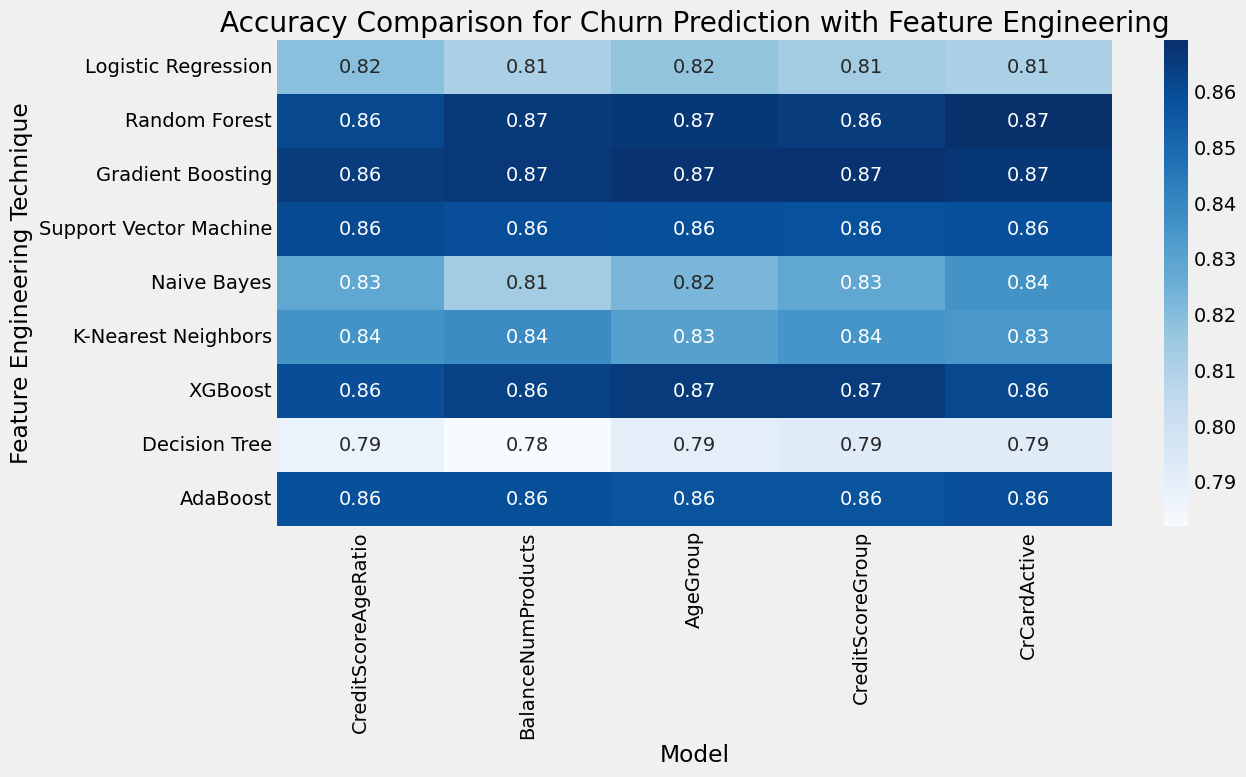

In [53]:
# List of feature engineering techniques
feature_engineering_techniques = [
    {
        'name': 'CreditScoreAgeRatio',
        'function': lambda df: df['CreditScore'] / df['Age']
    },
    {
        'name': 'BalanceNumProducts',
        'function': lambda df: df['Balance'] * df['NumOfProducts']
    },
    {
        'name': 'AgeGroup',
        'function': lambda df: pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=[1, 2, 3, 4, 5, 6])
    },
    {
        'name': 'CreditScoreGroup',
        'function': lambda df: pd.cut(df['CreditScore'], bins=[0, 400, 500, 600, 700, 800, np.inf], labels=[1, 2, 3, 4, 5, 6])
    },
    {
        'name': 'CrCardActive',
        'function': lambda df: df['HasCrCard'] * df['IsActiveMember']
    },
]

# Initialize a dictionary to store the results
results_fe = {}

# Apply each feature engineering technique
for technique in feature_engineering_techniques:
    df_fe = df.copy()
    df_fe[technique['name']] = technique['function'](df_fe)
    
    # Split the data into features and target
    X_fe = df_fe.drop('Exited', axis=1)
    y_fe = df_fe['Exited']
    
    # Split the data into training and test sets
    X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.25, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_fe_scaled = scaler.fit_transform(X_train_fe)
    X_test_fe_scaled = scaler.transform(X_test_fe)
    
    # Train and evaluate each model
    results_fe[technique['name']] = {}
    for name, model in models.items():
        model.fit(X_train_fe_scaled, y_train_fe)
        y_pred = model.predict(X_test_fe_scaled)
        accuracy = accuracy_score(y_test_fe, y_pred)
        results_fe[technique['name']][name] = accuracy

# Combine the results into a single DataFrame
results_df_fe = pd.DataFrame(results_fe)

# Print the results
print("Results:")
print(results_df_fe)

# Plot the results
plt.figure(figsize=(12, 6))
sns.heatmap(results_df_fe, annot=True, fmt=".2f", cmap='Blues')
plt.title('Accuracy Comparison for Churn Prediction with Feature Engineering')
plt.xlabel('Model')
plt.ylabel('Feature Engineering Technique')
plt.show()


In [54]:
output = results_df.to_string(index=True, header=True)
output = output.replace('/n', ' ')
print(output)


                    Model  Validation Accuracy (With Balancing)  Test Accuracy (With Balancing)  Validation Accuracy Difference
0     Logistic Regression                              0.698620                          0.6945                        0.004120
1           Random Forest                              0.784509                          0.7740                        0.010509
2       Gradient Boosting                              0.789110                          0.7885                        0.000610
3  Support Vector Machine                              0.782209                          0.7795                        0.002709
4             Naive Bayes                              0.736196                          0.7470                       -0.010804
5     K-Nearest Neighbors                              0.725460                          0.7220                        0.003460
6                 XGBoost                              0.761503                          0.7540         

In [55]:
from sklearn.metrics import confusion_matrix


In [56]:
# Training and evaluating each model without balancing
results_no_balancing = {}
confusion_matrices_no_balancing = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    ...
    confusion_matrices_no_balancing[name] = confusion_matrix(y_test, y_pred)
    ...


In [57]:
# Training and evaluating each model on balanced data
results_balancing = {}
confusion_matrices_balancing = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    ...
    confusion_matrices_balancing[name] = confusion_matrix(y_test, y_pred)
    ...


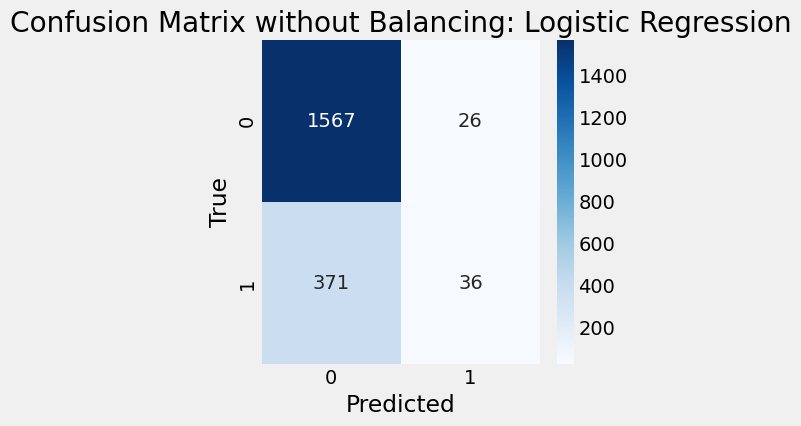

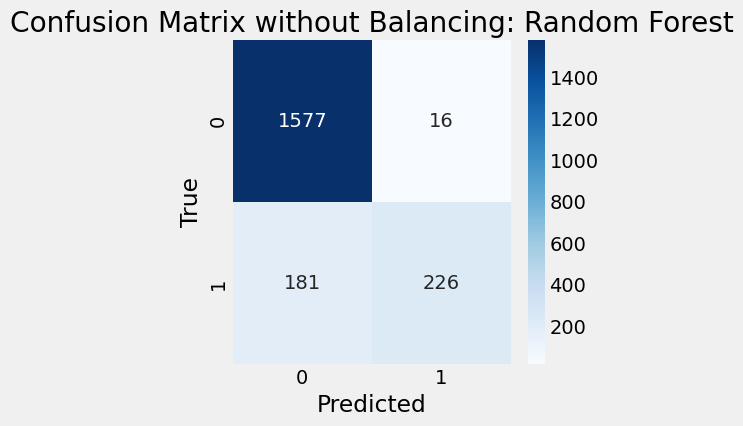

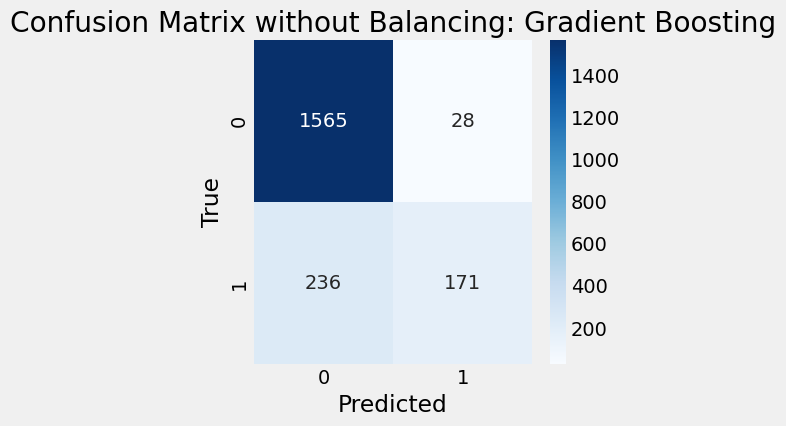

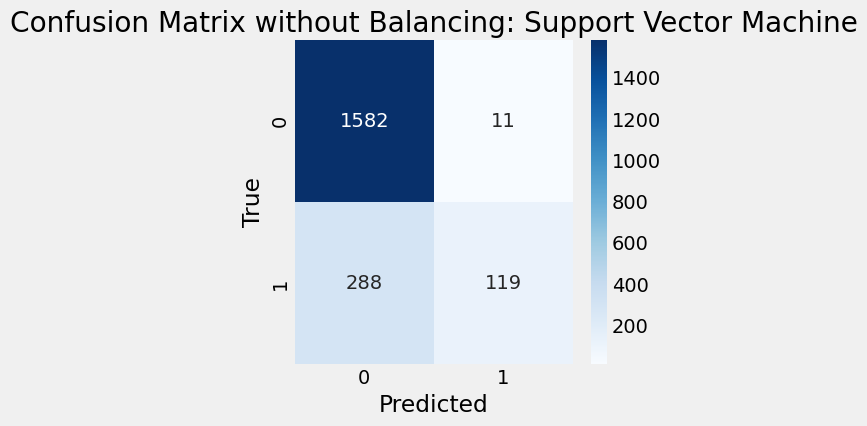

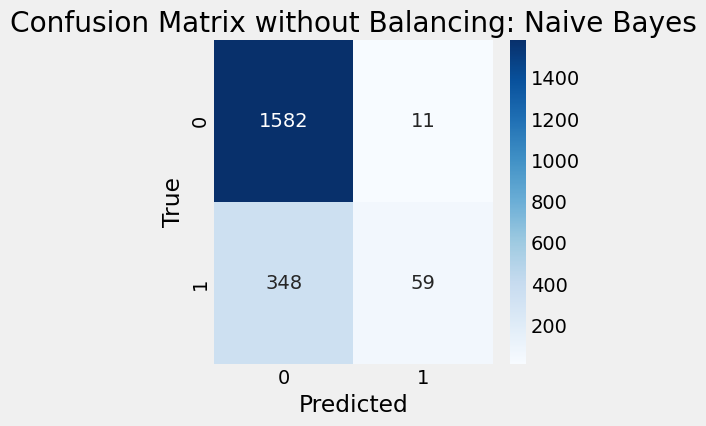

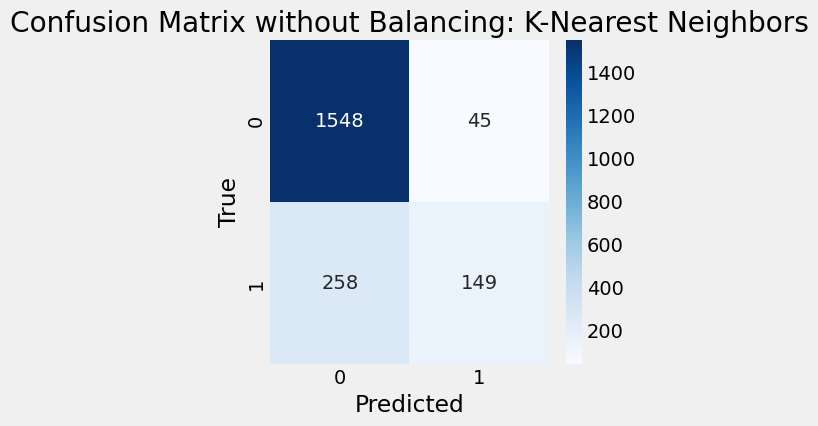

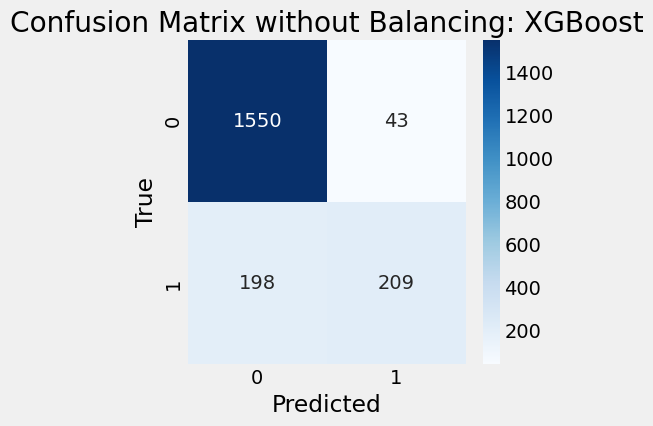

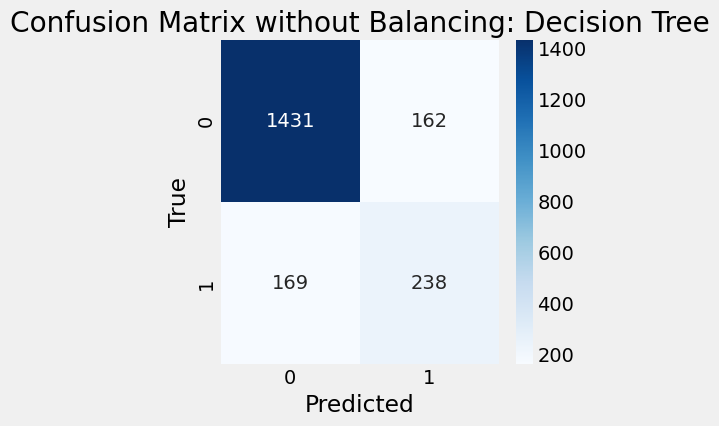

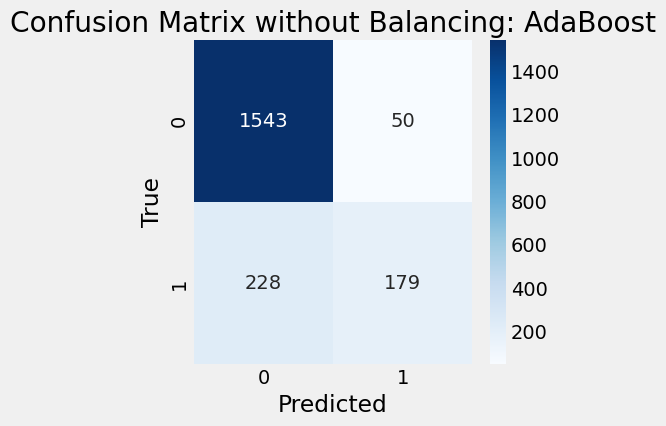

In [58]:
for name, matrix in confusion_matrices_no_balancing.items():
    plt.figure(figsize=(4, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix without Balancing: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


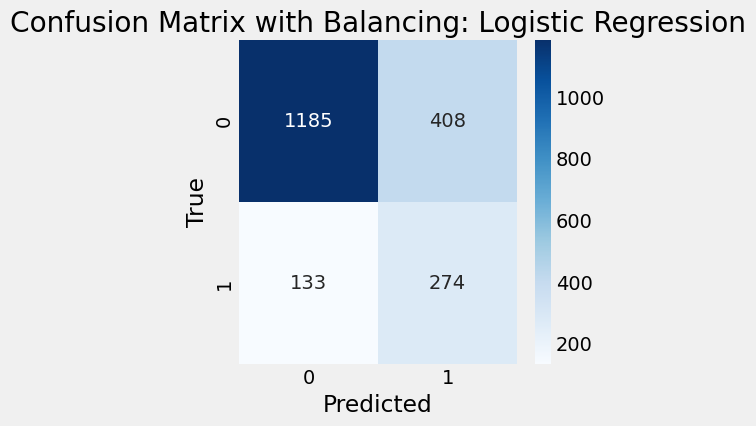

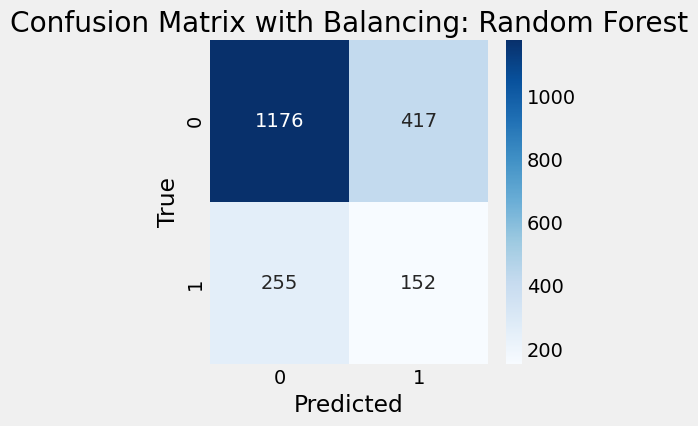

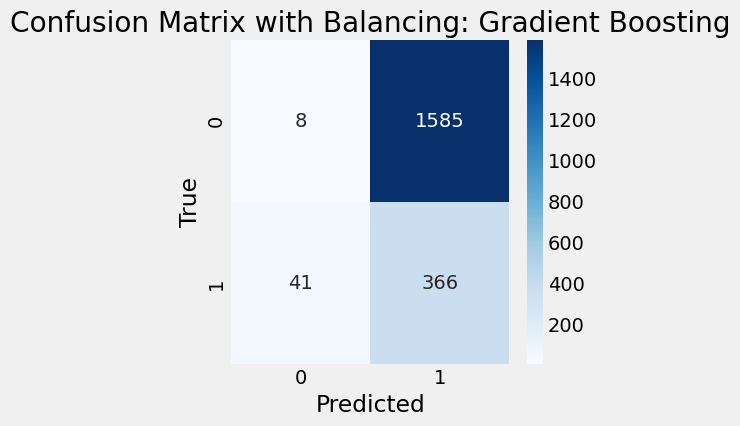

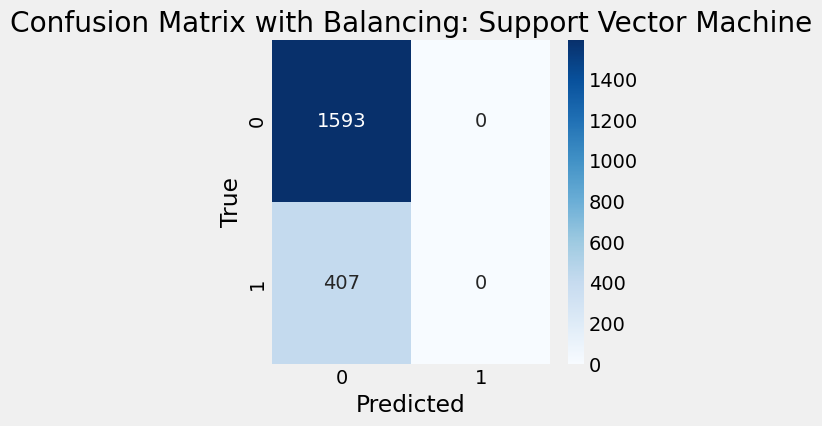

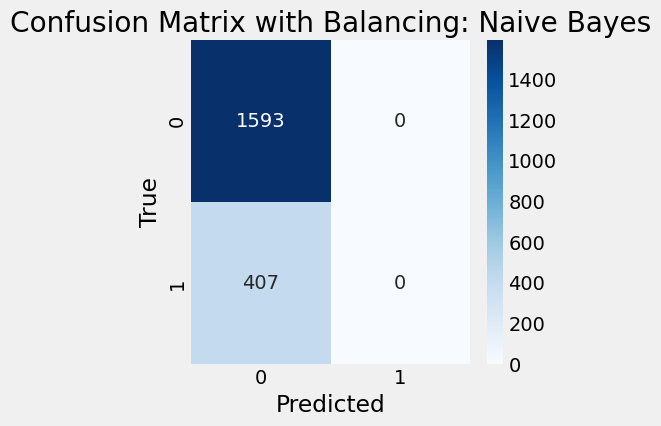

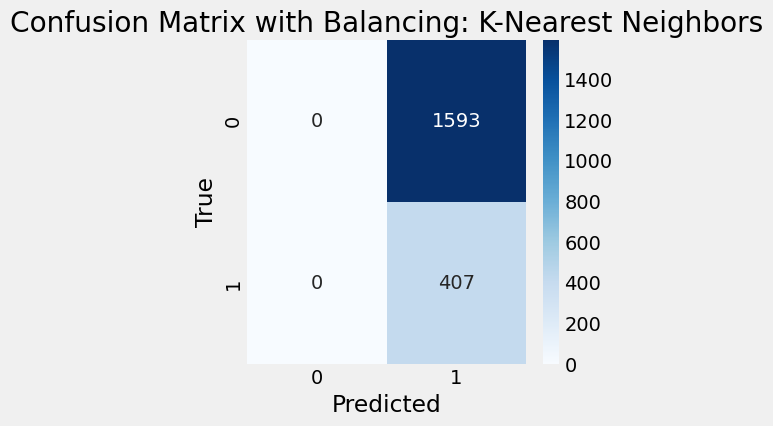

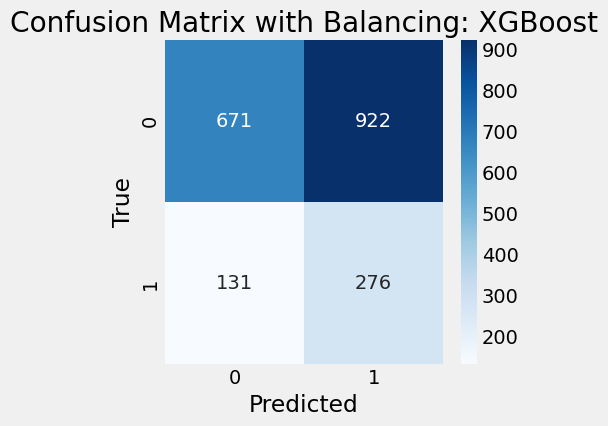

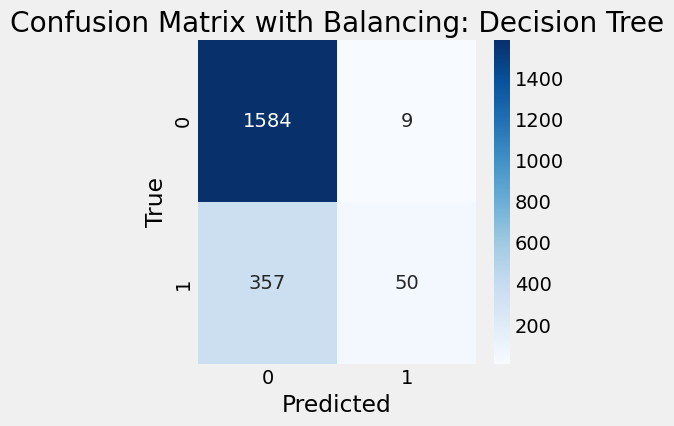

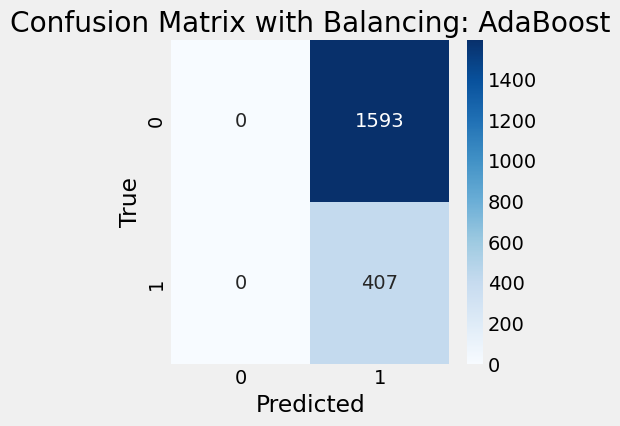

In [59]:
for name, matrix in confusion_matrices_balancing.items():
    plt.figure(figsize=(4, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix with Balancing: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


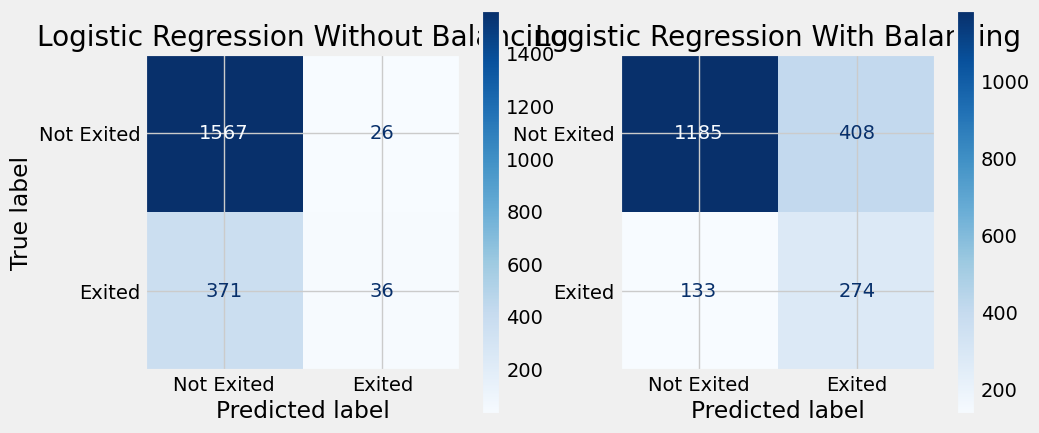

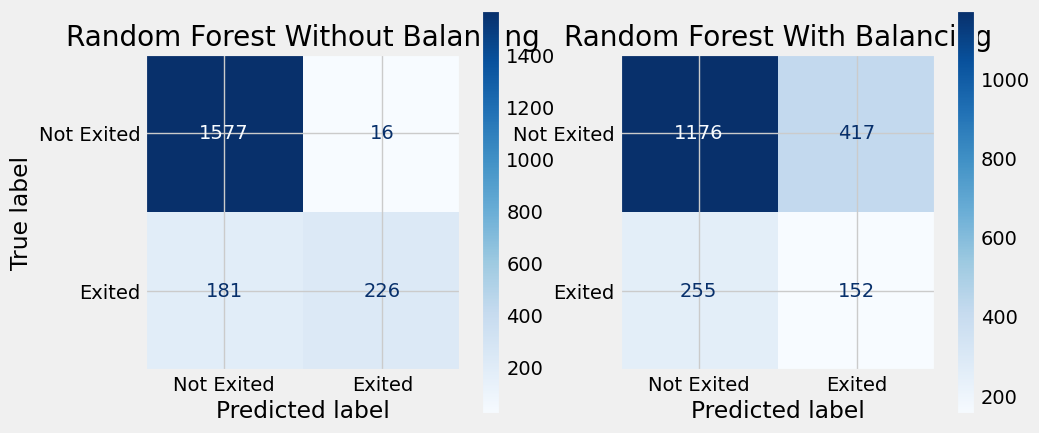

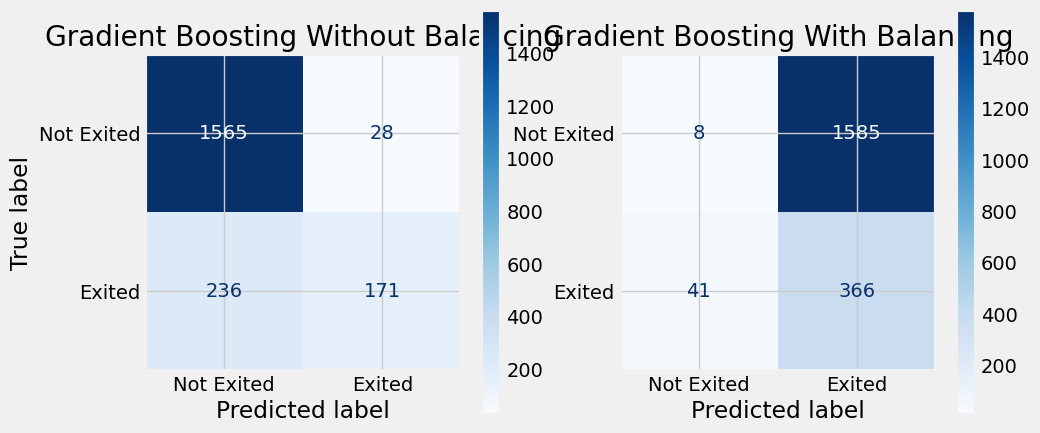

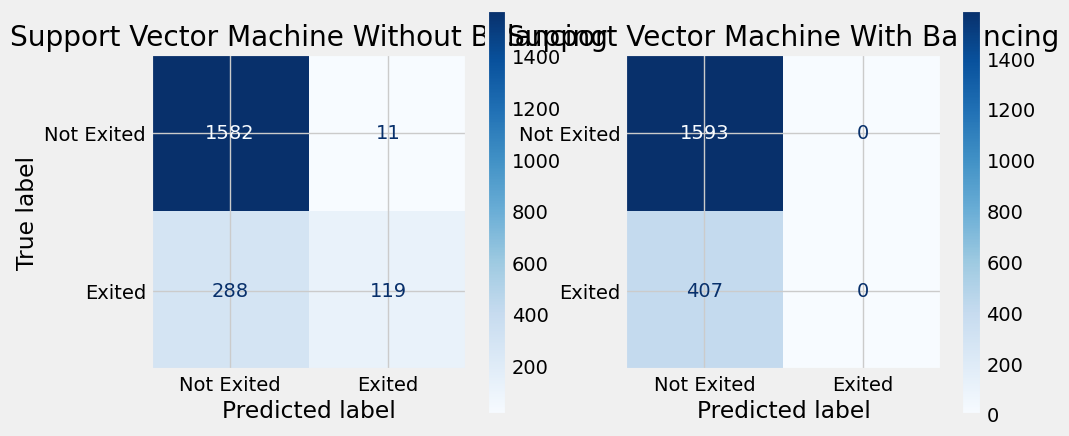

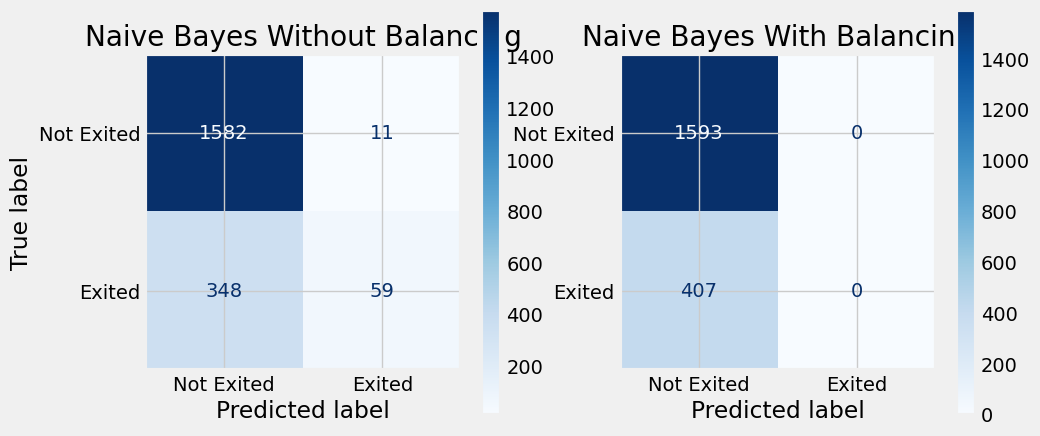

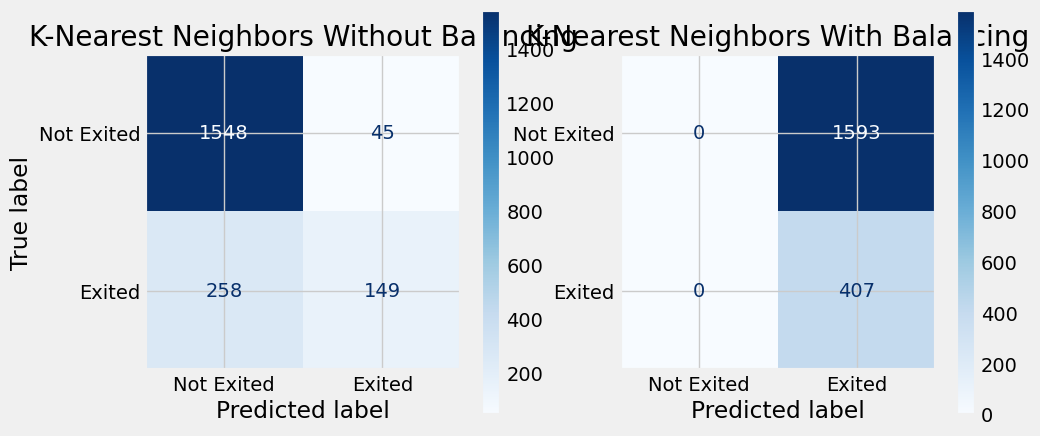

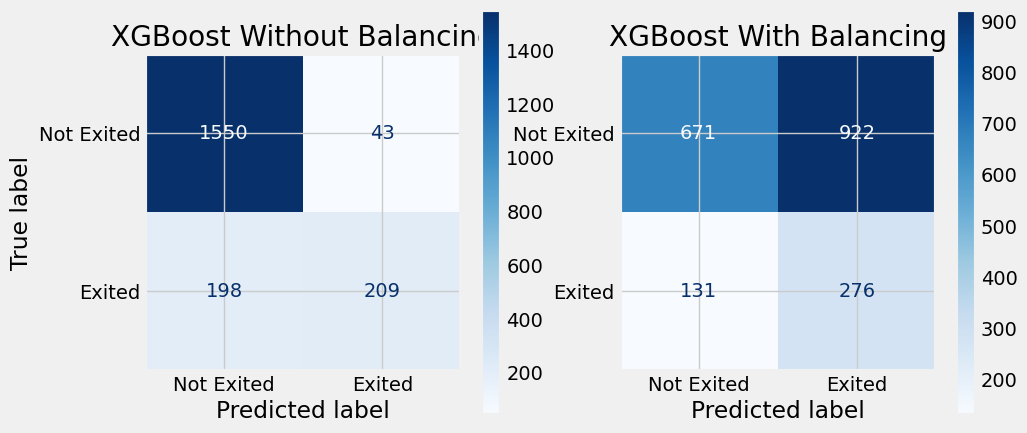

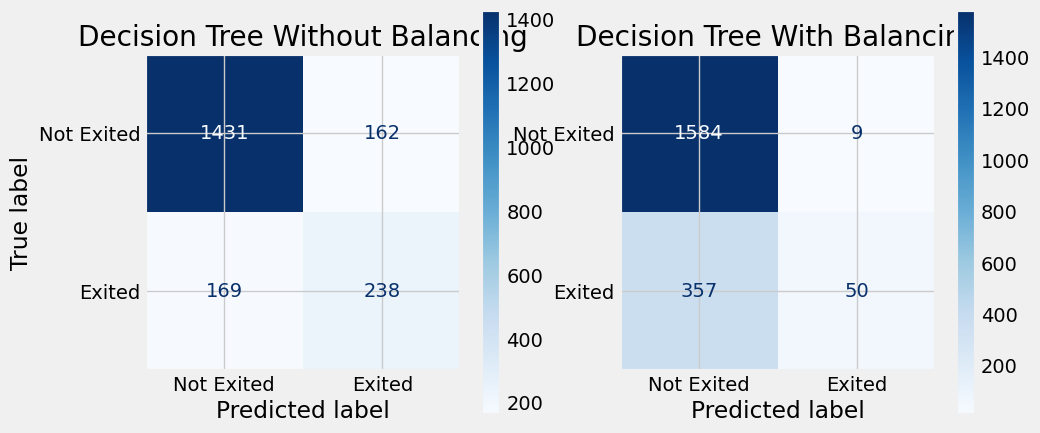

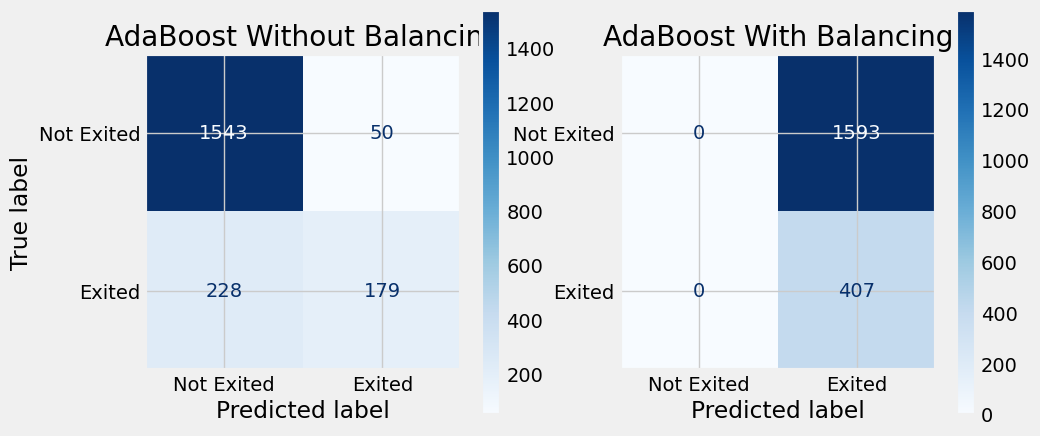

In [60]:
# Importing required libraries
from sklearn.metrics import ConfusionMatrixDisplay

for name in models.keys():
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Confusion matrix without balancing
    matrix = confusion_matrices_no_balancing[name]
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=['Not Exited','Exited'])
    disp = disp.plot(ax=ax[0], cmap='Blues')
    ax[0].set_title(f'{name} Without Balancing')
    
    # Confusion matrix with balancing
    matrix = confusion_matrices_balancing[name]
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=['Not Exited','Exited'])
    disp = disp.plot(ax=ax[1], cmap='Blues')
    ax[1].set_title(f'{name} With Balancing')
    
    plt.show()


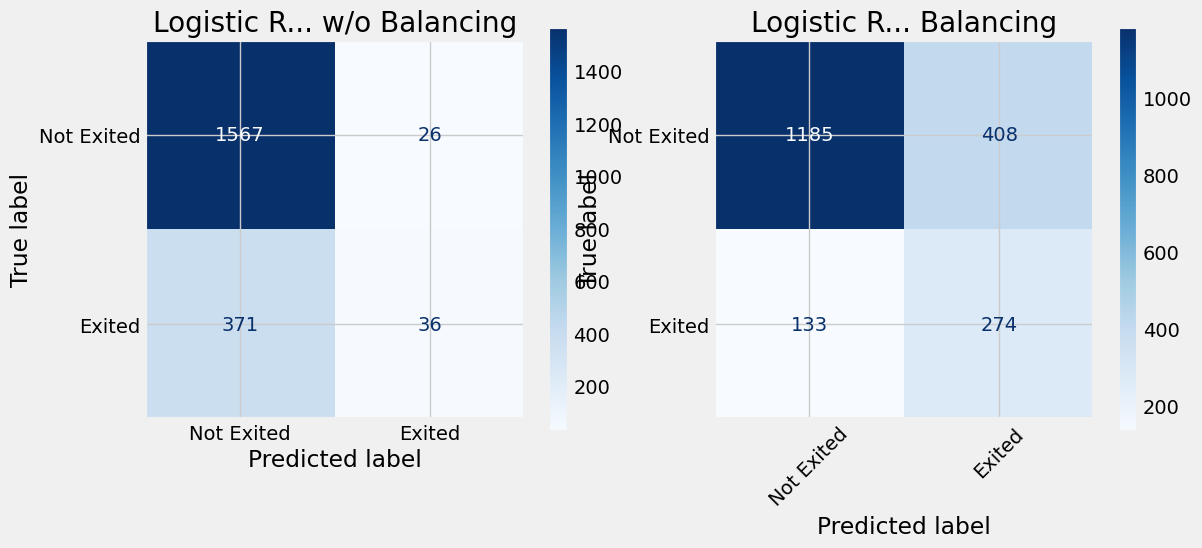

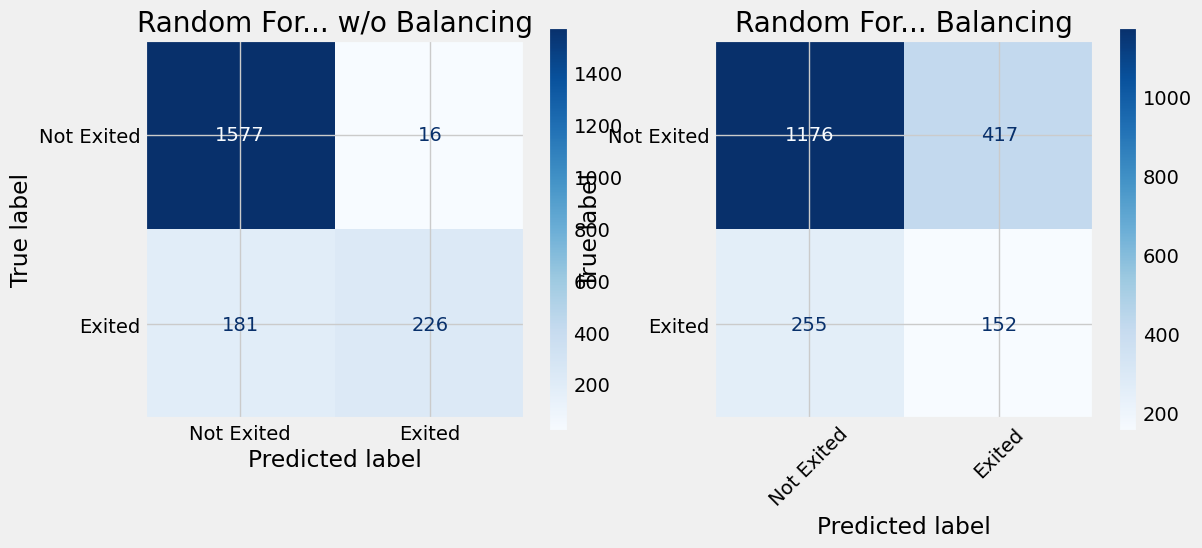

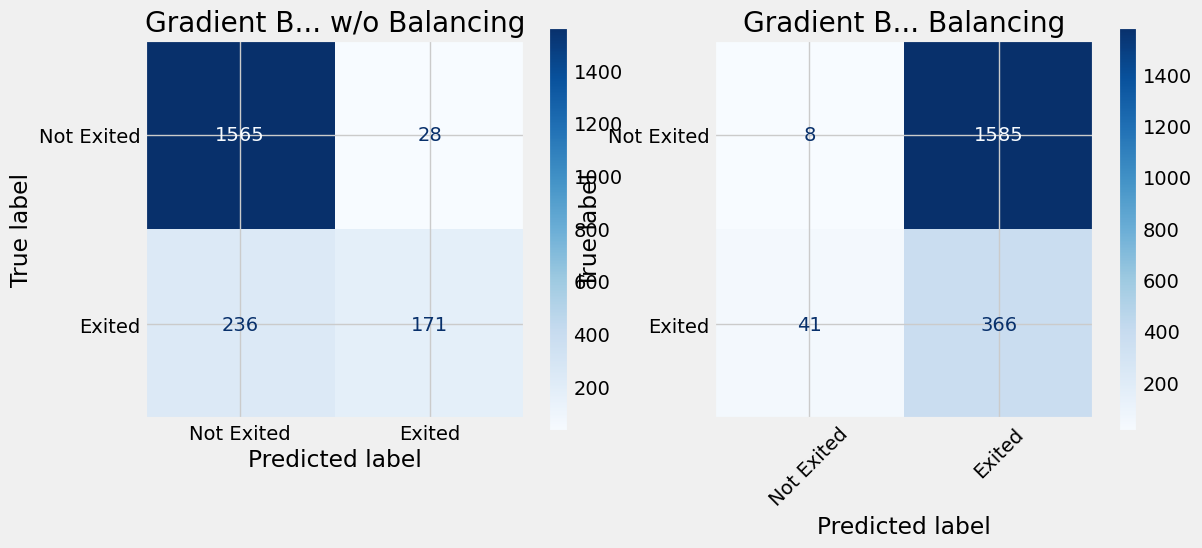

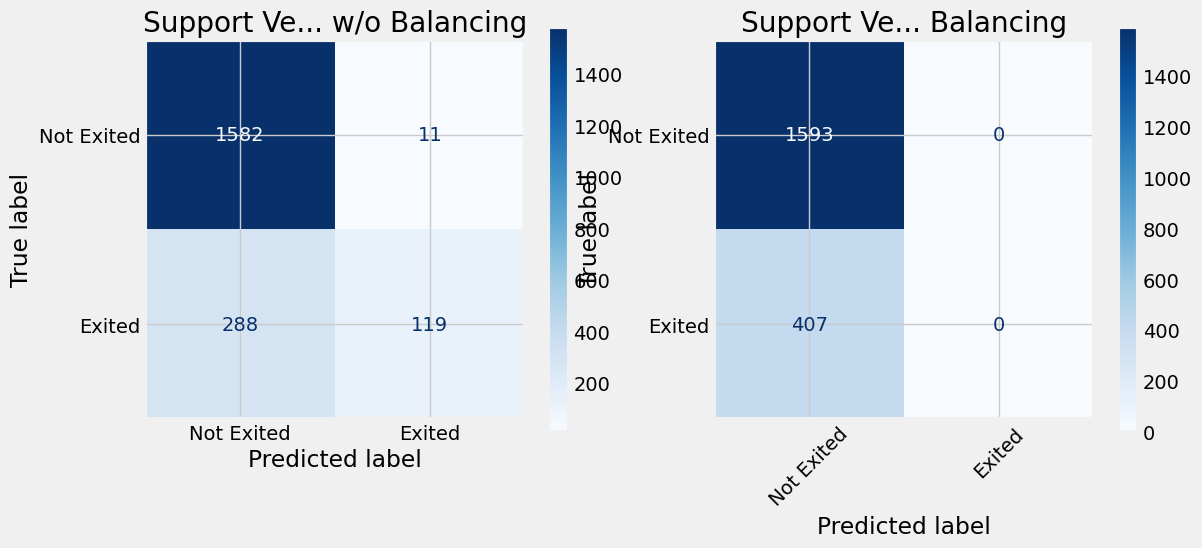

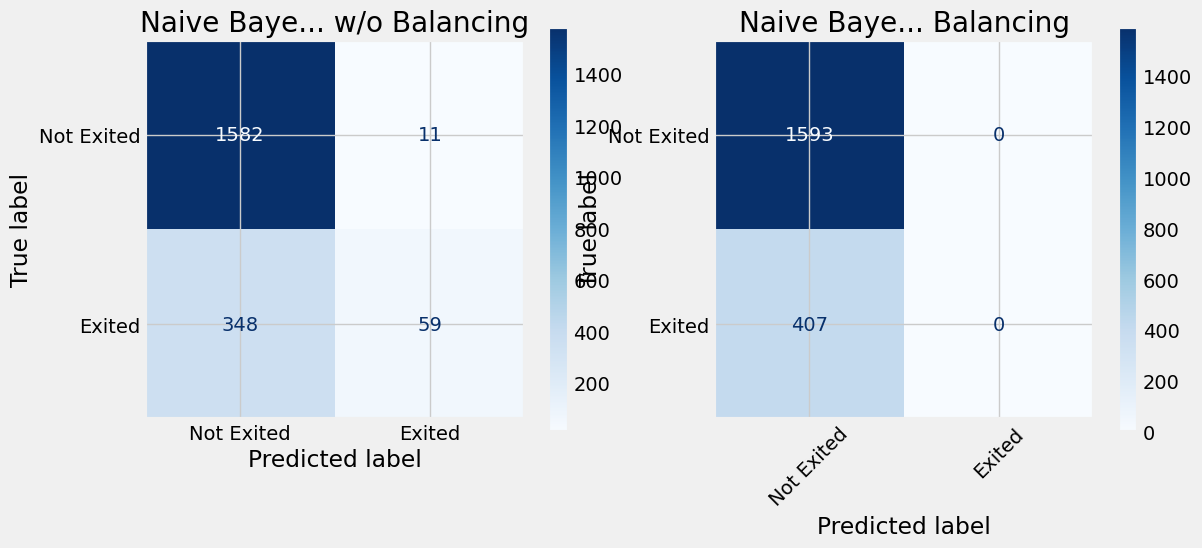

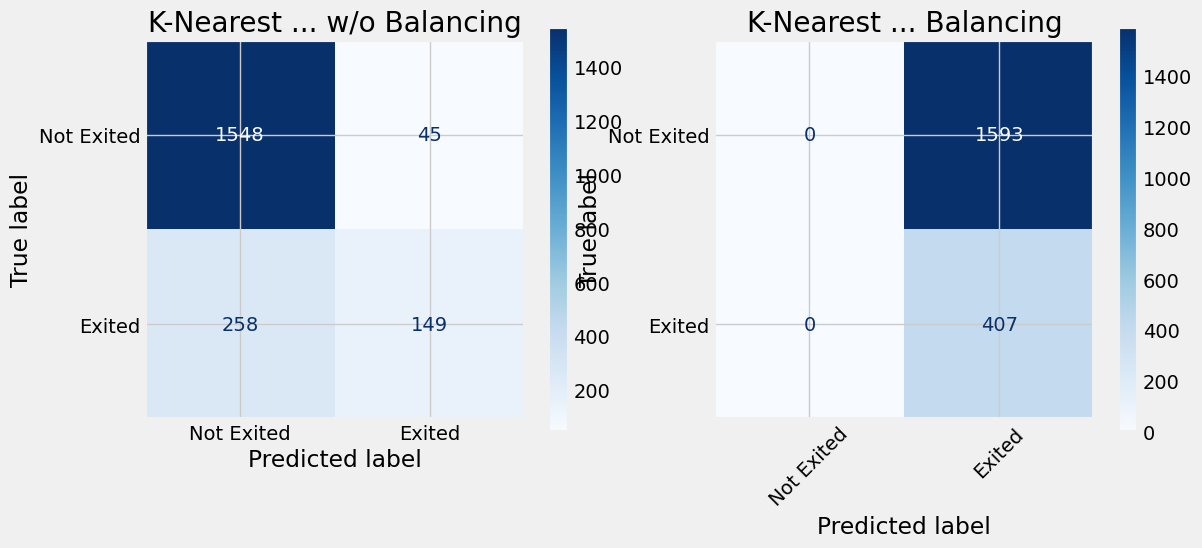

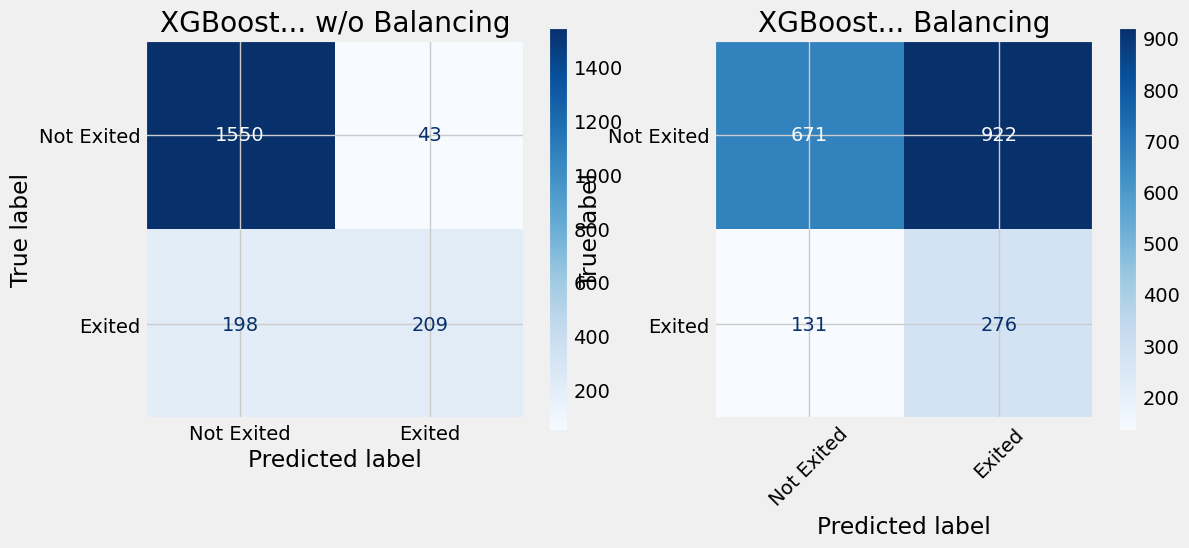

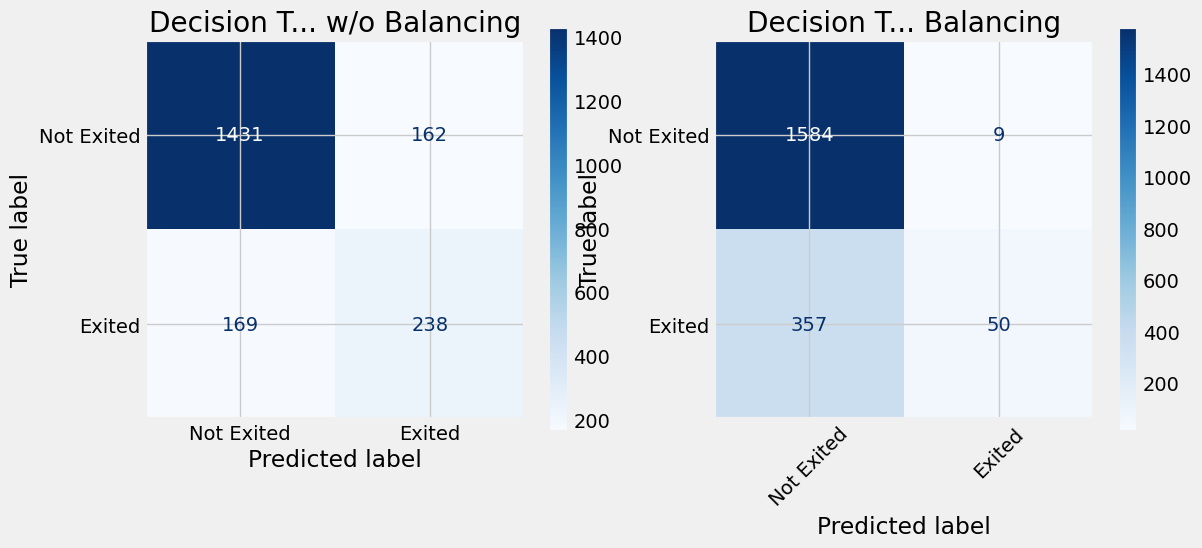

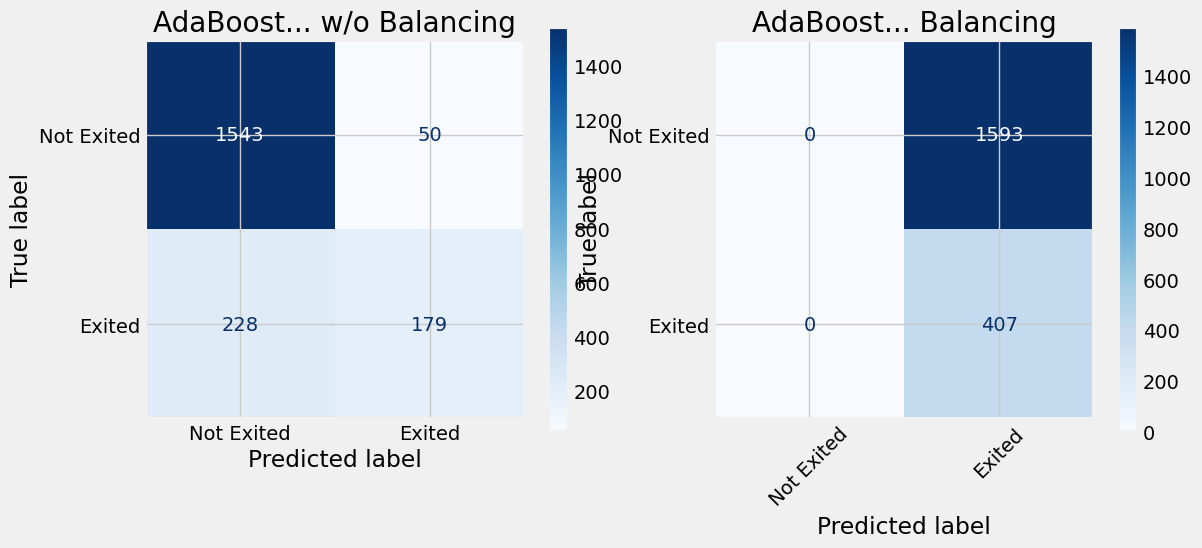

In [62]:
for name in models.keys():
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Confusion matrix without balancing
    matrix = confusion_matrices_no_balancing[name]
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                  display_labels=['Not Exited','Exited'])
    disp = disp.plot(ax=ax[0], cmap='Blues')
    ax[0].set_title(f'{name[:10]}... w/o Balancing') # Shorten the name
    plt.xticks(rotation=45) # Rotate x-labels
    
    # Confusion matrix with balancing
    matrix = confusion_matrices_balancing[name]
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                  display_labels=['Not Exited','Exited'])
    disp = disp.plot(ax=ax[1], cmap='Blues')
    ax[1].set_title(f'{name[:10]}... Balancing') # Shorten the name
    plt.xticks(rotation=45) # Rotate x-labels
    
    plt.show()
